# Phase 1:  XAI-Driven Feature Diagnosis

## Install Dependinces for U-Mamba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download and execute set up script
!wget -O py310.sh https://raw.githubusercontent.com/j3soon/colab-python-version/main/scripts/py310.sh
!bash py310.sh

--2025-12-15 12:13:08--  https://raw.githubusercontent.com/j3soon/colab-python-version/main/scripts/py310.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545 [text/plain]
Saving to: ‘py310.sh’

py310.sh            100%[===================>]     545  --.-KB/s    in 0s      

2025-12-15 12:13:09 (60.4 MB/s) - ‘py310.sh’ saved [545/545]

--2025-12-15 12:13:09--  https://repo.anaconda.com/miniconda/Miniconda3-py310_25.1.1-2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144058181 (137M) [application/octet-stream]
Saving to: ‘miniconda.sh’

minico

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 122.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 223.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 190.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 177.8 MB/s eta 0:00:00
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=90035 sha256=5e8402fa3fe5992f872a48e11c00e1f793d605522

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 matplotlib==3.7.5 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 132.7 MB/s eta 0:00:00


In [ ]:
!wget https://github.com/state-spaces/mamba/releases/download/v1.2.0.post1/mamba_ssm-1.2.0.post1+cu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
!wget https://github.com/Dao-AILab/causal-conv1d/releases/download/v1.2.0.post1/causal_conv1d-1.2.0.post1+cu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl

!pip install mamba_ssm-1.2.0.post1+cu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl -q
!pip install causal_conv1d-1.2.0.post1+cu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl -q

--2025-12-15 12:17:13--  https://github.com/state-spaces/mamba/releases/download/v1.2.0.post1/mamba_ssm-1.2.0.post1+cu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/725839295/5ff8ad94-3dba-40ea-9e0c-dd76d5e00621?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-15T13%3A17%3A31Z&rscd=attachment%3B+filename%3Dmamba_ssm-1.2.0.post1%2Bcu118torch2.0cxx11abiFALSE-cp310-cp310-linux_x86_64.whl&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-15T12%3A16%3A45Z&ske=2025-12-15T13%3A17%3A31Z&sks=b&skv=2018-11-09&sig=rhx2gMM96GOeimo5dCRkq1n%2FWWId5KAwnF2fl7HWx6E%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0a

In [ ]:
!pip install transformers==4.44.2 sentence-transformers==3.0.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 132.0 MB/s eta 0:00:00


In [ ]:
!pip install SimpleITK pyyaml scikit-learn scikit-image tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 141.0 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/bowang-lab/U-Mamba.git
%cd U-Mamba/umamba

Cloning into 'U-Mamba'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 301 (delta 45), reused 15 (delta 15), pack-reused 242 (from 2)
Receiving objects: 100% (301/301), 2.91 MiB | 7.91 MiB/s, done.
Resolving deltas: 100% (80/80), done.
/content/U-Mamba/umamba


In [ ]:
!pip install -e .

Obtaining file:///content/U-Mamba/umamba
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 145.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=15d607a91841bb8b158f77c09814e1bd75d9a9ac99bfa96537d223bc4756be79
  Stored in directory: /root/.cache/pip/wheels/3d/b6/be/e13cccebb2aa8855f678b02ad449e803de1dfbe75853c34b3e
Successfully built grad-cam


In [ ]:
!pip install -U nnunetv2-cam

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


## Downloading and preparing the data for Inference

In [ ]:
!cp -r /content/drive/MyDrive/topcow_ct_only.zip /content/

In [ ]:
!unzip topcow_ct_only.zip

Archive:  topcow_ct_only.zip
   creating: topcow_ct_only/
   creating: topcow_ct_only/cow_seg_labelsTr/
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_057.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_153.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_017.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_024.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_155.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_074.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_132.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_082.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_080.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_058.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_008.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_067.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow_ct_034.nii  
  inflating: topcow_ct_only/cow_seg_labelsTr/topcow

In [ ]:
import os
import random
from pathlib import Path
import shutil
random.seed(42)
src_label = Path("/content/topcow_ct_only/cow_seg_labelsTr")
src = Path("/content/topcow_ct_only/imagesTr")

dst_img = Path("/content/content/Domain_shift_inference/topcow_Inference_Data/image")
dst_label = Path("/content/content/Domain_shift_inference/topcow_Inference_Data/label")

dst_img.mkdir(parents=True, exist_ok=True)
dst_label.mkdir(parents=True, exist_ok=True)

# List only CT image files
ct_files = sorted(src.glob("topcow_ct_*_0000.nii"))

# Sample 5 CT cases
sampled = random.sample(ct_files, 5)

print("Selected cases:")
for img_path in sampled:
    print(img_path.name)

    # Copy image
    shutil.copy(img_path, dst_img / img_path.name)

    # Label filename matches everything except directory
    label_name = img_path.name.replace("_0000.nii", ".nii")  # labels are NOT 0000-suffixed
    label_path = src_label / label_name

    if label_path.exists():
        shutil.copy(label_path, dst_label / label_name)
    else:
        print("Warning: Label not found for:", label_name)


Selected cases:
topcow_ct_082_0000.nii
topcow_ct_015_0000.nii
topcow_ct_004_0000.nii
topcow_ct_135_0000.nii
topcow_ct_036_0000.nii


In [ ]:
!pip install gdown
!gdown 1nzi9Xtq8ZBMUCHWwUWMY9xwYPTg2Hnn8
!unzip Domain_shift_inference.zip

Downloading...
From (original): https://drive.google.com/uc?id=1nzi9Xtq8ZBMUCHWwUWMY9xwYPTg2Hnn8
From (redirected): https://drive.google.com/uc?id=1nzi9Xtq8ZBMUCHWwUWMY9xwYPTg2Hnn8&confirm=t&uuid=581164d8-424a-404c-8e78-cc08d20e9903
To: /content/Domain_shift_inference.zip
100% 97.2M/97.2M [00:02<00:00, 36.8MB/s]
Archive:  Domain_shift_inference.zip
   creating: content/Domain_shift_inference/RSNA_Inference_Data/
   creating: content/Domain_shift_inference/RSNA_Inference_Data/label/
  inflating: content/Domain_shift_inference/RSNA_Inference_Data/label/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii  
   creating: content/Domain_shift_inference/RSNA_Inference_Data/image/
  inflating: content/Domain_shift_inference/RSNA_Inference_Data/image/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii  
   creating: content/Domain_shift_inference/RSNA_Inference_Data/.ipynb_checkpoints/
  inflating: content/Domain_shift_inference/topcow_Inference_Data/label

In [ ]:
!gdown 1toc5vVgn4C4hBxflAj1ryx0Tpfap4QiO
!unzip Dataset997_CTA_Aneurysm.zip

Downloading...
From (original): https://drive.google.com/uc?id=1toc5vVgn4C4hBxflAj1ryx0Tpfap4QiO
From (redirected): https://drive.google.com/uc?id=1toc5vVgn4C4hBxflAj1ryx0Tpfap4QiO&confirm=t&uuid=ffa60044-7bfc-49bb-8eae-de633756d551
To: /content/Dataset997_CTA_Aneurysm.zip
100% 629M/629M [00:10<00:00, 60.2MB/s]
Archive:  Dataset997_CTA_Aneurysm.zip
   creating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/.ipynb_checkpoints/
  inflating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/dataset_fingerprint.json  
  inflating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/dataset.json  
  inflating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/fold_0/debug.json  
  inflating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/fold_0/training_log_2025_10_3_15_39_52.txt  
  inflating: Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres/fold_0/progr

In [ ]:
!mkdir -p /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel

In [ ]:
!cp /content/content/Domain_shift_inference/topcow_Inference_Data/label/* /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel

In [ ]:
#convert imagesVal data from nii to gz
import os
from pathlib import Path
import nibabel as nib

input_folder = Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel")

for f in input_folder.glob("*.nii"):
    img = nib.load(f)
    new_path = f.with_suffix('.nii.gz')
    nib.save(img, new_path)
    os.remove(f)
    print(f"Converted {f.name} → {new_path.name}")

print("✅ All files converted to .nii.gz")


Converted topcow_ct_004.nii → topcow_ct_004.nii.gz
Converted topcow_ct_082.nii → topcow_ct_082.nii.gz
Converted topcow_ct_015.nii → topcow_ct_015.nii.gz
Converted topcow_ct_001.nii → topcow_ct_001.nii.gz
Converted topcow_ct_036.nii → topcow_ct_036.nii.gz
Converted topcow_ct_135.nii → topcow_ct_135.nii.gz
✅ All files converted to .nii.gz


In [ ]:
!mkdir -p /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs

In [ ]:
!cp /content/content/Domain_shift_inference/RSNA_Inference_Data/label/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs

In [ ]:
#convert imagesVal data from nii to gz
import os
from pathlib import Path
import nibabel as nib

input_folder = Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs")

for f in input_folder.glob("*.nii"):
    img = nib.load(f)
    new_path = f.with_suffix('.nii.gz')
    nib.save(img, new_path)
    os.remove(f)
    print(f"Converted {f.name} → {new_path.name}")

print("✅ All files converted to .nii.gz")


Converted 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii → 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz
✅ All files converted to .nii.gz


In [ ]:
!mkdir -p /content/U-Mamba/data/nnUNet_results/Dataset997_CTA_Aneurysm

In [ ]:
!cp -r /content/Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres /content/U-Mamba/data/nnUNet_results/Dataset997_CTA_Aneurysm/

In [ ]:
!mkdir -p /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow

In [ ]:
!cp /content/content/Domain_shift_inference/topcow_Inference_Data/image/* /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow

In [ ]:

#convert imagesVal data from nii to gz
import os
from pathlib import Path
import nibabel as nib

input_folder = Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow")

for f in input_folder.glob("*.nii"):
    img = nib.load(f)
    new_path = f.with_suffix('.nii.gz')
    nib.save(img, new_path)
    os.remove(f)
    print(f"Converted {f.name} → {new_path.name}")

print("✅ All files converted to .nii.gz")


Converted topcow_ct_036_0000.nii → topcow_ct_036_0000.nii.gz
Converted topcow_ct_015_0000.nii → topcow_ct_015_0000.nii.gz
Converted topcow_ct_135_0000.nii → topcow_ct_135_0000.nii.gz
Converted topcow_ct_082_0000.nii → topcow_ct_082_0000.nii.gz
Converted topcow_ct_004_0000.nii → topcow_ct_004_0000.nii.gz
Converted topcow_ct_001_0000.nii → topcow_ct_001_0000.nii.gz
✅ All files converted to .nii.gz


In [ ]:
!nnUNetv2_predict -i /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow -o /content/CTA_997_nn_unet/predictval_cow -d 997 -c 3d_fullres -f 0 -tr nnUNetTrainerUMambaBot --disable_tta


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

UMambaBot: UMambaBot(
  (encoder): UNetResEncoder(
    (stem): Sequential(
      (0): BasicResBlock(
        (conv1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act1): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm2): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act2): LeakyReLU(negative_slope=0.01, inp

In [ ]:
!mkdir -p /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA

In [ ]:
!cp /content/content/Domain_shift_inference/RSNA_Inference_Data/image/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA

In [ ]:
import os
from pathlib import Path
import nibabel as nib

val_folder = Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA")
old_file_path = val_folder / "1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii"
# The correct filename needs the _0000 suffix for nnU-Net prediction
new_file_path = val_folder / "1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz"

# Convert .nii to .nii.gz and ensure the correct name
if old_file_path.exists():
    img = nib.load(old_file_path)
    nib.save(img, new_file_path)
    os.remove(old_file_path)
    print(f"Converted and renamed {old_file_path.name} to {new_file_path.name}")
else:
    print("File already processed or not found.")

Converted and renamed 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii to 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz


In [ ]:
!nnUNetv2_predict -i /content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA -o /content/CTA_997_nn_unet/predictval_RSNA -d 997 -c 3d_fullres -f 0 -tr nnUNetTrainerUMambaBot --disable_tta


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

UMambaBot: UMambaBot(
  (encoder): UNetResEncoder(
    (stem): Sequential(
      (0): BasicResBlock(
        (conv1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act1): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm2): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act2): LeakyReLU(negative_slope=0.01, inp

## Proper quantification (RSNA/TopCow) :
	Perfect Vs Best vs Bad vs worsrt (how many cases)
| Category    | Dice Threshold   |
| ----------- | -------------------------- |
| **Worst**   | ≤ **0.40**                 |
| **Bad**     | **0.40** < Dice ≤ **0.65** |
| **Best**    | **0.65** < Dice ≤ **0.85** |
| **Perfect** | > **0.85**                 |


In [ ]:
import re
from pathlib import Path
import numpy as np
import nibabel as nib
from collections import Counter
import statistics

# --------------------------
# Utility functions
# --------------------------
def calculate_dice_score(prediction, ground_truth):
    """Dice for two binary numpy arrays (same shape)."""
    prediction = prediction.astype(bool)
    ground_truth = ground_truth.astype(bool)
    intersection = np.sum(prediction & ground_truth)
    total_pixels = np.sum(prediction) + np.sum(ground_truth)
    if total_pixels == 0:
        # both empty -> perfect match (kept as 1.0; change to np.nan if you prefer)
        return 1.0
    return (2.0 * intersection) / total_pixels if total_pixels > 0 else 0.0

def get_case_id_from_filename(p: Path):
    """Normalize to a stable case id (strip extensions and _0000)."""
    name = p.name
    if name.endswith(".nii.gz"):
        base = name[:-7]
    else:
        base = Path(name).stem
    if base.endswith("_0000"):
        base = base[:-5]
    return base

def find_matching_gt(case_id: str, gt_dir: Path):
    """Find the best-matching GT file in gt_dir for the given case_id."""
    matches = list(gt_dir.glob(f"*{case_id}*"))
    if not matches:
        return None

    def score(p):
        s = 0
        n = p.name
        if n == f"{case_id}.nii.gz": s += 200
        if n == f"{case_id}.nii": s += 180
        if n.startswith(case_id) and n.endswith("_0000.nii.gz"): s += 160
        if n.startswith(case_id) and n.endswith("_0000.nii"): s += 140
        # prefer shorter filenames
        s += 100 - len(n)
        return s

    matches.sort(key=score, reverse=True)
    return matches[0]

# --------------------------
# Analyze a single prediction / GT pair
# --------------------------
def analyze_volume_and_slices(prediction_path, ground_truth_path, thresholds):
    """
    Returns:
      - counts: dict of slice category counts (Worst/Bad/Best/Perfect/True Negative)
      - volume_dice: single Dice score for the entire 3D volume
      - dice_list_slices: list of per-slice dice values (excludes true-negative slices)
    """
    try:
        pred_vol = nib.load(str(prediction_path)).get_fdata()
        gt_vol = nib.load(str(ground_truth_path)).get_fdata()
    except Exception as e:
        print(f"Error loading:\n  - {prediction_path}\n  - {ground_truth_path}\n  Error: {e}")
        return None, None, []

    # binarize
    pred_vol = (pred_vol > 0).astype(np.uint8)
    gt_vol = (gt_vol > 0).astype(np.uint8)

    if pred_vol.shape != gt_vol.shape:
        print(f"[ERROR] Shape mismatch for:\n  - pred: {prediction_path} -> {pred_vol.shape}\n  - gt:   {ground_truth_path} -> {gt_vol.shape}")
        return None, None, []

    # --- Volume-wise Dice ---
    volume_dice = calculate_dice_score(pred_vol, gt_vol)

    # --- Slice-wise categories (kept for backward compatibility) ---
    counts = {'Worst': 0, 'Bad': 0, 'Best': 0, 'Perfect': 0, 'True Negative': 0}
    dice_list_slices = []
    num_slices = gt_vol.shape[2]

    for i in range(num_slices):
        pred_slice = pred_vol[:, :, i]
        gt_slice = gt_vol[:, :, i]

        if np.sum(pred_slice) == 0 and np.sum(gt_slice) == 0:
            counts['True Negative'] += 1
            continue

        dice = calculate_dice_score(pred_slice, gt_slice)
        dice_list_slices.append(dice)

        if dice <= thresholds['Worst']:
            counts['Worst'] += 1
        elif thresholds['Bad'][0] < dice <= thresholds['Bad'][1]:
            counts['Bad'] += 1
        elif thresholds['Best'][0] < dice <= thresholds['Best'][1]:
            counts['Best'] += 1
        elif dice > thresholds['Perfect']:
            counts['Perfect'] += 1
        else:
            # boundary fallback
            if dice == thresholds['Worst']:
                counts['Worst'] += 1
            elif dice == thresholds['Bad'][1] or dice == thresholds['Best'][1]:
                counts['Best'] += 1
            else:
                counts['Bad'] += 1

    return counts, volume_dice, dice_list_slices

# --------------------------
# Folder analyzer (single dataset)
# --------------------------
def analyze_pred_folder(pred_dir, gt_dir, thresholds):
    pred_dir = Path(pred_dir)
    gt_dir = Path(gt_dir)

    if not pred_dir.exists():
        raise FileNotFoundError(f"Prediction dir not found: {pred_dir}")
    if not gt_dir.exists():
        raise FileNotFoundError(f"GT dir not found: {gt_dir}")

    # Only .nii.gz prediction files
    pred_files = sorted(pred_dir.glob("*.nii.gz"))

    if len(pred_files) == 0:
        print(f"No .nii.gz prediction files found in {pred_dir}")
        return {}, Counter(), []

    overall_counter = Counter()
    per_case_results = {}
    volume_dice_values = []  # collect volume-wise dice for this dataset

    for pred_path in pred_files:
        case_id = get_case_id_from_filename(pred_path)
        gt_match = find_matching_gt(case_id, gt_dir)

        if gt_match is None:
            print(f"[WARN] No GT found for prediction {pred_path.name} (case_id='{case_id}'). Skipping.")
            continue

        counts, volume_dice, dice_slices = analyze_volume_and_slices(pred_path, gt_match, thresholds)
        if counts is None:
            print(f"[WARN] Analysis failed for {pred_path.name}.")
            continue

        per_case_results[case_id] = {
            "pred": pred_path,
            "gt": gt_match,
            "counts": counts,
            "volume_dice": volume_dice,
            "slice_dices": dice_slices
        }

        overall_counter.update(counts)
        # Append volume-level dice (keep even if it's 1.0 for empty vols)
        volume_dice_values.append(volume_dice)

        total_slices = sum(counts.values())
        print("\n" + "-"*60)
        print(f"Case: {case_id}")
        print(f" Prediction : {pred_path.name}")
        print(f" GT         : {gt_match.name}")
        print(f" Volume Dice: {volume_dice:.4f}")
        print(f" Total slices: {total_slices}")
        for cat, cnt in counts.items():
            pct = 100.0 * cnt / total_slices if total_slices > 0 else 0.0
            print(f"  {cat:<12}: {cnt:4d}  ({pct:5.1f}%)")
        print("-"*60)

    return per_case_results, overall_counter, volume_dice_values

# --------------------------
# MAIN: run for two datasets and compare
# --------------------------
if __name__ == "__main__":
    # EDIT these paths to your directories if needed
    DATASETS = [
        {
            "name": "RSNA",
            "pred_dir": Path("/content/CTA_997_nn_unet/predictval_RSNA"),
            "gt_dir":   Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs"),
        },
        {
            "name": "TopCow",
            "pred_dir": Path("/content/CTA_997_nn_unet/predictval_cow"),
            "gt_dir":   Path("/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel"),
        }
    ]

    DICE_THRESHOLDS = {
        'Worst': 0.40,
        'Bad': (0.40, 0.65),
        'Best': (0.65, 0.85),
        'Perfect': 0.85
    }

    aggregated = {}

    for ds in DATASETS:

        per_case, overall_counts, vol_dice_vals = analyze_pred_folder(ds['pred_dir'], ds['gt_dir'], DICE_THRESHOLDS)
        aggregated[ds['name']] = {
            "counts": overall_counts,
            "volume_dice_values": vol_dice_vals,
            "per_case": per_case
        }

        if len(vol_dice_vals) == 0:
            print(f"[INFO] No volumes processed for dataset {ds['name']} (maybe all skipped).")

    # --------------------------
    # Print aggregated category distribution per dataset
    # --------------------------

    categories = ['Perfect', 'Best', 'Bad', 'Worst', 'True Negative']

    for name, data in aggregated.items():
        counts = data["counts"]
        total_slices = sum(counts.values())

        if total_slices == 0:
            continue
        for cat in categories:
            cnt = counts.get(cat, 0)
            pct = 100.0 * cnt / total_slices if total_slices > 0 else 0.0
            print(f"  {cat:<15}: {cnt:6d}   ({pct:5.1f}%)")
        print("-"*80)

    # --------------------------
    # Print aggregated volume-wise Dice stats per dataset
    # --------------------------

    for name, data in aggregated.items():
        vals = np.array(data["volume_dice_values"], dtype=float)
        n = len(vals)

        if n == 0:
            continue

        mean_d = float(np.mean(vals))
        median_d = float(np.median(vals))
        std_d = float(np.std(vals, ddof=0))
        min_d = float(np.min(vals))
        max_d = float(np.max(vals))



    # --------------------------
    # Comparative tables
    # --------------------------
    print("\n\n" + "#"*100)
    print("COMPARATIVE SUMMARY: CATEGORY COUNTS & MEAN VOLUME DICE")
    print("#"*100)

    # Category comparative table (counts + %)
    header = f"{'Category':<15} | {'RSNA count (%)':<20} | {'TopCow count (%)':<20}"
    print(header)
    print("-"*100)
    rsna_counts = aggregated.get("RSNA", {}).get("counts", Counter())
    topcow_counts = aggregated.get("TopCow", {}).get("counts", Counter())
    rsna_total = sum(rsna_counts.values()) or 1
    topcow_total = sum(topcow_counts.values()) or 1

    for cat in categories:
        r_cnt = rsna_counts.get(cat, 0)
        t_cnt = topcow_counts.get(cat, 0)
        r_pct = 100.0 * r_cnt / rsna_total if rsna_total > 0 else 0.0
        t_pct = 100.0 * t_cnt / topcow_total if topcow_total > 0 else 0.0
        print(f"{cat:<15} | {r_cnt:6d} ({r_pct:5.1f}%)   | {t_cnt:6d} ({t_pct:5.1f}%)")
    print("-"*100)

    # Mean volume Dice comparative
    def safe_mean(lst):
        return float(np.mean(lst)) if len(lst) > 0 else float("nan")

    rsna_mean = safe_mean(aggregated.get("RSNA", {}).get("volume_dice_values", []))
    topcow_mean = safe_mean(aggregated.get("TopCow", {}).get("volume_dice_values", []))

    print("\n" + "-"*80)
    print(f"{'Dataset':<12} | {'Mean Volume Dice':<18} | {'#Volumes':<10}")
    print("-"*80)
    print(f"{'RSNA':<12} | {rsna_mean:<18.4f} | {len(aggregated.get('RSNA', {}).get('volume_dice_values', [])):<10d}")
    print(f"{'TopCow':<12} | {topcow_mean:<18.4f} | {len(aggregated.get('TopCow', {}).get('volume_dice_values', [])):<10d}")
    print("#"*100)



------------------------------------------------------------
Case: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182
 Prediction : 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz
 GT         : 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz
 Volume Dice: 0.8604
 Total slices: 217
  Worst       :    4  (  1.8%)
  Bad         :    7  (  3.2%)
  Best        :   13  (  6.0%)
  Perfect     :   40  ( 18.4%)
  True Negative:  153  ( 70.5%)
------------------------------------------------------------

------------------------------------------------------------
Case: topcow_ct_001
 Prediction : topcow_ct_001.nii.gz
 GT         : topcow_ct_001.nii.gz
 Volume Dice: 0.2772
 Total slices: 243
  Worst       :  118  ( 48.6%)
  Bad         :   18  (  7.4%)
  Best        :    0  (  0.0%)
  Perfect     :    0  (  0.0%)
  True Negative:  107  ( 44.0%)
------------------------------------------------------------

----------------------------

## Generating CAMs

In [ ]:

from nnunetv2_cam.api import run_cam_for_prediction
from nnunetv2.inference.predict_from_raw_data import nnUNetPredictor
import torch
import numpy as np


predictor = nnUNetPredictor(device=torch.device('cuda'))
predictor.initialize_from_trained_model_folder(
    '/content/U-Mamba/data/nnUNet_results/Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres',
    use_folds=(0,)
)
methods = ['hirescam','gradcam']
layers = ['encoder.stages.4.0','encoder.stages.5.0','decoder.stages.0.0','decoder.stages.1.0','decoder.stages.2.0','decoder.stages.3.0','decoder.stages.4.0']
for m in methods:
  heatmaps = run_cam_for_prediction(
      predictor=predictor,
      input_files='/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow',
      output_folder=f'/content/infer/output',
      target_layer=layers,
      method=m,
      target_class=1,
      verbose=True,
      cam_type='3d'

  )
  for i, hm in enumerate(heatmaps):
    np.save(f'/content/infer/output/{m}_{i}.npy', hm)



UMambaBot: UMambaBot(
  (encoder): UNetResEncoder(
    (stem): Sequential(
      (0): BasicResBlock(
        (conv1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act1): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm2): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act2): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv3): Conv3d(1, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
      )
      (1): BasicBlockD(
        (conv1): ConvDropoutNormReLU(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (norm): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (nonlin): LeakyReLU(negative_slope=0.01, inpl

Processing files:   0%|          | 0/6 [00:17<?, ?it/s, Processing: topcow_ct_001_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([243, 369, 320])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([243, 369, 320])
n_steps 60, image size is torch.Size([243, 369, 320]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [14:03<00:00, 14.07s/it]
                                                                   

resizing data, order is 1
data shape (1, 243, 369, 320)
resizing data, order is 1
data shape (1, 243, 369, 320)




Saving slices:   0%|          | 0/243 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/243 [00:00<00:13, 18.09it/s]

Saving slices:   2%|▏         | 6/243 [00:00<00:08, 27.36it/s]

Saving slices:   4%|▍         | 10/243 [00:00<00:07, 29.54it/s]

Saving slices:   6%|▌         | 14/243 [00:00<00:07, 30.25it/s]

Saving slices:   7%|▋         | 18/243 [00:00<00:07, 30.18it/s]

Saving slices:   9%|▉         | 22/243 [00:00<00:07, 30.45it/s]

Saving slices:  11%|█         | 26/243 [00:00<00:07, 30.71it/s]

Saving slices:  12%|█▏        | 30/243 [00:01<00:06, 30.72it/s]

Saving slices:  14%|█▍        | 34/243 [00:01<00:06, 30.84it/s]

Saving slices:  16%|█▌        | 38/243 [00:01<00:06, 30.85it/s]

Saving slices:  17%|█▋        | 42/243 [00:01<00:06, 31.17it/s]

Saving slices:  19%|█▉        | 46/243 [00:01<00:06, 31.21it/s]

Saving slices:  21%|██        | 50/243 [00:01<00:06, 31.47it/s]

Saving slices:  22%|██▏       | 54/243 [00:01<00:05, 31.62it/s]

Saving slices:  24%|██▍       | 58

✓ Completed: topcow_ct_001_0000.nii.gz


Processing files:  17%|█▋        | 1/6 [14:52<1:12:41, 872.33s/it, Processing: topcow_ct_004_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([251, 389, 317])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([251, 389, 317])
n_steps 60, image size is torch.Size([251, 389, 317]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [13:50<00:00, 13.80s/it]
                                                                   

resizing data, order is 1
data shape (1, 251, 389, 317)
resizing data, order is 1
data shape (1, 251, 389, 317)




Saving slices:   0%|          | 0/224 [00:00<?, ?it/s]

Saving slices:   1%|▏         | 3/224 [00:00<00:09, 22.76it/s]

Saving slices:   3%|▎         | 6/224 [00:00<00:09, 23.35it/s]

Saving slices:   4%|▍         | 9/224 [00:00<00:09, 23.29it/s]

Saving slices:   5%|▌         | 12/224 [00:00<00:08, 23.73it/s]

Saving slices:   7%|▋         | 15/224 [00:00<00:08, 24.07it/s]

Saving slices:   8%|▊         | 18/224 [00:00<00:08, 23.71it/s]

Saving slices:   9%|▉         | 21/224 [00:00<00:08, 23.30it/s]

Saving slices:  11%|█         | 24/224 [00:01<00:08, 23.19it/s]

Saving slices:  12%|█▏        | 27/224 [00:01<00:08, 23.03it/s]

Saving slices:  13%|█▎        | 30/224 [00:01<00:08, 23.16it/s]

Saving slices:  15%|█▍        | 33/224 [00:01<00:08, 23.19it/s]

Saving slices:  16%|█▌        | 36/224 [00:01<00:08, 23.07it/s]

Saving slices:  17%|█▋        | 39/224 [00:01<00:08, 22.89it/s]

Saving slices:  19%|█▉        | 42/224 [00:01<00:07, 22.80it/s]

Saving slices:  20%|██        | 45/

✓ Completed: topcow_ct_004_0000.nii.gz


Processing files:  33%|███▎      | 2/6 [29:16<57:55, 868.79s/it, Processing: topcow_ct_015_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([244, 374, 303])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([244, 374, 303])
n_steps 60, image size is torch.Size([244, 374, 303]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [13:44<00:00, 13.51s/it]
                                                                   

resizing data, order is 1
data shape (1, 244, 374, 303)
resizing data, order is 1
data shape (1, 244, 374, 303)




Saving slices:   0%|          | 0/203 [00:00<?, ?it/s]

Saving slices:   1%|▏         | 3/203 [00:00<00:06, 28.79it/s]

Saving slices:   3%|▎         | 6/203 [00:00<00:06, 28.36it/s]

Saving slices:   5%|▍         | 10/203 [00:00<00:06, 29.42it/s]

Saving slices:   7%|▋         | 14/203 [00:00<00:06, 30.43it/s]

Saving slices:   9%|▉         | 18/203 [00:00<00:06, 30.20it/s]

Saving slices:  11%|█         | 22/203 [00:00<00:06, 29.13it/s]

Saving slices:  12%|█▏        | 25/203 [00:00<00:06, 28.61it/s]

Saving slices:  14%|█▍        | 28/203 [00:00<00:06, 28.41it/s]

Saving slices:  15%|█▌        | 31/203 [00:01<00:06, 28.22it/s]

Saving slices:  17%|█▋        | 34/203 [00:01<00:05, 28.32it/s]

Saving slices:  18%|█▊        | 37/203 [00:01<00:05, 28.37it/s]

Saving slices:  20%|█▉        | 40/203 [00:01<00:05, 28.30it/s]

Saving slices:  21%|██        | 43/203 [00:01<00:05, 28.29it/s]

Saving slices:  23%|██▎       | 46/203 [00:01<00:05, 28.35it/s]

Saving slices:  24%|██▍       | 49

✓ Completed: topcow_ct_015_0000.nii.gz


Processing files:  50%|█████     | 3/6 [43:29<43:04, 861.52s/it, Processing: topcow_ct_036_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([234, 366, 300])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([234, 366, 300])
n_steps 48, image size is torch.Size([234, 366, 300]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 48/48 [10:52<00:00, 13.45s/it]
                                                                   

resizing data, order is 1
data shape (1, 234, 366, 300)
resizing data, order is 1
data shape (1, 234, 366, 300)




Saving slices:   0%|          | 0/209 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/209 [00:00<00:10, 18.82it/s]

Saving slices:   2%|▏         | 5/209 [00:00<00:09, 20.80it/s]

Saving slices:   4%|▍         | 8/209 [00:00<00:09, 21.02it/s]

Saving slices:   5%|▌         | 11/209 [00:00<00:09, 21.06it/s]

Saving slices:   7%|▋         | 14/209 [00:00<00:09, 21.03it/s]

Saving slices:   8%|▊         | 17/209 [00:00<00:09, 20.74it/s]

Saving slices:  10%|▉         | 20/209 [00:00<00:09, 20.26it/s]

Saving slices:  11%|█         | 23/209 [00:01<00:09, 19.83it/s]

Saving slices:  12%|█▏        | 25/209 [00:01<00:09, 19.47it/s]

Saving slices:  13%|█▎        | 27/209 [00:01<00:09, 18.92it/s]

Saving slices:  14%|█▍        | 29/209 [00:01<00:09, 18.65it/s]

Saving slices:  15%|█▍        | 31/209 [00:01<00:09, 18.47it/s]

Saving slices:  16%|█▌        | 33/209 [00:01<00:09, 18.84it/s]

Saving slices:  17%|█▋        | 36/209 [00:01<00:08, 19.55it/s]

Saving slices:  18%|█▊        | 38/

✓ Completed: topcow_ct_036_0000.nii.gz


Processing files:  67%|██████▋   | 4/6 [54:57<26:24, 792.46s/it, Processing: topcow_ct_082_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([245, 405, 301])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([245, 405, 301])
n_steps 75, image size is torch.Size([245, 405, 301]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 75/75 [17:13<00:00, 13.79s/it]
                                                                   

resizing data, order is 1
data shape (1, 245, 405, 301)
resizing data, order is 1
data shape (1, 245, 405, 301)




Saving slices:   0%|          | 0/219 [00:00<?, ?it/s]

Saving slices:   1%|▏         | 3/219 [00:00<00:09, 23.91it/s]

Saving slices:   3%|▎         | 6/219 [00:00<00:08, 23.67it/s]

Saving slices:   4%|▍         | 9/219 [00:00<00:08, 23.68it/s]

Saving slices:   5%|▌         | 12/219 [00:00<00:09, 22.93it/s]

Saving slices:   7%|▋         | 15/219 [00:00<00:08, 22.94it/s]

Saving slices:   8%|▊         | 18/219 [00:00<00:08, 22.96it/s]

Saving slices:  10%|▉         | 21/219 [00:00<00:08, 22.90it/s]

Saving slices:  11%|█         | 24/219 [00:01<00:08, 22.60it/s]

Saving slices:  12%|█▏        | 27/219 [00:01<00:08, 22.28it/s]

Saving slices:  14%|█▎        | 30/219 [00:01<00:08, 22.10it/s]

Saving slices:  15%|█▌        | 33/219 [00:01<00:08, 21.96it/s]

Saving slices:  16%|█▋        | 36/219 [00:01<00:08, 21.92it/s]

Saving slices:  18%|█▊        | 39/219 [00:01<00:08, 21.93it/s]

Saving slices:  19%|█▉        | 42/219 [00:01<00:08, 22.12it/s]

Saving slices:  21%|██        | 45/

✓ Completed: topcow_ct_082_0000.nii.gz


Processing files:  83%|████████▎ | 5/6 [1:12:43<14:51, 891.50s/it, Processing: topcow_ct_135_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([238, 377, 306])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([238, 377, 306])
n_steps 48, image size is torch.Size([238, 377, 306]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 48/48 [11:06<00:00, 13.94s/it]
                                                                   

resizing data, order is 1
data shape (1, 238, 377, 306)
resizing data, order is 1
data shape (1, 238, 377, 306)




Saving slices:   0%|          | 0/198 [00:00<?, ?it/s]

Saving slices:   2%|▏         | 3/198 [00:00<00:08, 23.99it/s]

Saving slices:   3%|▎         | 6/198 [00:00<00:07, 24.68it/s]

Saving slices:   5%|▍         | 9/198 [00:00<00:07, 24.62it/s]

Saving slices:   6%|▌         | 12/198 [00:00<00:07, 24.33it/s]

Saving slices:   8%|▊         | 15/198 [00:00<00:07, 24.17it/s]

Saving slices:   9%|▉         | 18/198 [00:00<00:07, 24.00it/s]

Saving slices:  11%|█         | 21/198 [00:00<00:07, 23.72it/s]

Saving slices:  12%|█▏        | 24/198 [00:01<00:07, 23.19it/s]

Saving slices:  14%|█▎        | 27/198 [00:01<00:07, 22.69it/s]

Saving slices:  15%|█▌        | 30/198 [00:01<00:07, 22.22it/s]

Saving slices:  17%|█▋        | 33/198 [00:01<00:07, 22.17it/s]

Saving slices:  18%|█▊        | 36/198 [00:01<00:07, 21.91it/s]

Saving slices:  20%|█▉        | 39/198 [00:01<00:07, 21.78it/s]

Saving slices:  21%|██        | 42/198 [00:01<00:07, 21.59it/s]

Saving slices:  23%|██▎       | 45/

✓ Completed: topcow_ct_135_0000.nii.gz
Processing 6 files...
Target layer: ['encoder.stages.4.0', 'encoder.stages.5.0', 'decoder.stages.0.0', 'decoder.stages.1.0', 'decoder.stages.2.0', 'decoder.stages.3.0', 'decoder.stages.4.0']
Target class: 1
Method: gradcam
CAM type: 3d


Processing files:   0%|          | 0/6 [00:17<?, ?it/s, Processing: topcow_ct_001_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([243, 369, 320])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([243, 369, 320])
n_steps 60, image size is torch.Size([243, 369, 320]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [13:53<00:00, 13.93s/it]
                                                                   

resizing data, order is 1
data shape (1, 243, 369, 320)
resizing data, order is 1
data shape (1, 243, 369, 320)




Saving slices:   0%|          | 0/243 [00:00<?, ?it/s]

Saving slices:   1%|          | 3/243 [00:00<00:09, 26.13it/s]

Saving slices:   2%|▏         | 6/243 [00:00<00:09, 25.52it/s]

Saving slices:   4%|▎         | 9/243 [00:00<00:09, 25.01it/s]

Saving slices:   5%|▍         | 12/243 [00:00<00:09, 24.67it/s]

Saving slices:   6%|▌         | 15/243 [00:00<00:09, 24.53it/s]

Saving slices:   7%|▋         | 18/243 [00:00<00:09, 24.68it/s]

Saving slices:   9%|▊         | 21/243 [00:00<00:09, 24.50it/s]

Saving slices:  10%|▉         | 24/243 [00:00<00:08, 24.63it/s]

Saving slices:  11%|█         | 27/243 [00:01<00:08, 24.59it/s]

Saving slices:  12%|█▏        | 30/243 [00:01<00:08, 24.68it/s]

Saving slices:  14%|█▎        | 33/243 [00:01<00:08, 24.94it/s]

Saving slices:  15%|█▍        | 36/243 [00:01<00:08, 25.01it/s]

Saving slices:  16%|█▌        | 39/243 [00:01<00:08, 24.88it/s]

Saving slices:  17%|█▋        | 42/243 [00:01<00:08, 24.81it/s]

Saving slices:  19%|█▊        | 45/

✓ Completed: topcow_ct_001_0000.nii.gz


Processing files:  17%|█▋        | 1/6 [14:44<1:11:59, 863.87s/it, Processing: topcow_ct_004_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([251, 389, 317])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([251, 389, 317])
n_steps 60, image size is torch.Size([251, 389, 317]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [13:55<00:00, 13.90s/it]
                                                                   

resizing data, order is 1
data shape (1, 251, 389, 317)
resizing data, order is 1
data shape (1, 251, 389, 317)




Saving slices:   0%|          | 0/224 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/224 [00:00<00:11, 19.87it/s]

Saving slices:   2%|▏         | 4/224 [00:00<00:11, 19.81it/s]

Saving slices:   3%|▎         | 6/224 [00:00<00:10, 19.84it/s]

Saving slices:   4%|▎         | 8/224 [00:00<00:10, 19.70it/s]

Saving slices:   4%|▍         | 10/224 [00:00<00:10, 19.72it/s]

Saving slices:   5%|▌         | 12/224 [00:00<00:10, 19.67it/s]

Saving slices:   6%|▋         | 14/224 [00:00<00:10, 19.67it/s]

Saving slices:   7%|▋         | 16/224 [00:00<00:10, 19.56it/s]

Saving slices:   8%|▊         | 18/224 [00:00<00:10, 19.38it/s]

Saving slices:   9%|▉         | 20/224 [00:01<00:10, 19.26it/s]

Saving slices:  10%|▉         | 22/224 [00:01<00:10, 19.24it/s]

Saving slices:  11%|█         | 24/224 [00:01<00:10, 19.08it/s]

Saving slices:  12%|█▏        | 26/224 [00:01<00:10, 19.09it/s]

Saving slices:  12%|█▎        | 28/224 [00:01<00:10, 19.30it/s]

Saving slices:  14%|█▍        | 31/2

✓ Completed: topcow_ct_004_0000.nii.gz


Processing files:  33%|███▎      | 2/6 [29:13<57:55, 868.94s/it, Processing: topcow_ct_015_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([244, 374, 303])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([244, 374, 303])
n_steps 60, image size is torch.Size([244, 374, 303]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 60/60 [13:45<00:00, 13.60s/it]
                                                                   

resizing data, order is 1
data shape (1, 244, 374, 303)
resizing data, order is 1
data shape (1, 244, 374, 303)




Saving slices:   0%|          | 0/203 [00:00<?, ?it/s]

Saving slices:   1%|▏         | 3/203 [00:00<00:08, 24.18it/s]

Saving slices:   3%|▎         | 6/203 [00:00<00:08, 23.32it/s]

Saving slices:   4%|▍         | 9/203 [00:00<00:08, 23.70it/s]

Saving slices:   6%|▌         | 12/203 [00:00<00:07, 24.01it/s]

Saving slices:   7%|▋         | 15/203 [00:00<00:07, 23.88it/s]

Saving slices:   9%|▉         | 18/203 [00:00<00:07, 23.50it/s]

Saving slices:  10%|█         | 21/203 [00:00<00:07, 23.33it/s]

Saving slices:  12%|█▏        | 24/203 [00:01<00:07, 23.34it/s]

Saving slices:  13%|█▎        | 27/203 [00:01<00:07, 23.29it/s]

Saving slices:  15%|█▍        | 30/203 [00:01<00:07, 23.35it/s]

Saving slices:  16%|█▋        | 33/203 [00:01<00:07, 23.21it/s]

Saving slices:  18%|█▊        | 36/203 [00:01<00:07, 23.14it/s]

Saving slices:  19%|█▉        | 39/203 [00:01<00:07, 23.23it/s]

Saving slices:  21%|██        | 42/203 [00:01<00:06, 23.14it/s]

Saving slices:  22%|██▏       | 45/

✓ Completed: topcow_ct_015_0000.nii.gz


Processing files:  50%|█████     | 3/6 [43:30<43:08, 862.91s/it, Processing: topcow_ct_036_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([234, 366, 300])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([234, 366, 300])
n_steps 48, image size is torch.Size([234, 366, 300]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 48/48 [10:54<00:00, 13.73s/it]
                                                                   

resizing data, order is 1
data shape (1, 234, 366, 300)
resizing data, order is 1
data shape (1, 234, 366, 300)




Saving slices:   0%|          | 0/209 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/209 [00:00<00:11, 17.52it/s]

Saving slices:   2%|▏         | 4/209 [00:00<00:11, 17.40it/s]

Saving slices:   3%|▎         | 6/209 [00:00<00:11, 17.31it/s]

Saving slices:   4%|▍         | 8/209 [00:00<00:11, 17.13it/s]

Saving slices:   5%|▍         | 10/209 [00:00<00:11, 16.98it/s]

Saving slices:   6%|▌         | 12/209 [00:00<00:11, 16.90it/s]

Saving slices:   7%|▋         | 14/209 [00:00<00:11, 16.86it/s]

Saving slices:   8%|▊         | 16/209 [00:00<00:11, 16.74it/s]

Saving slices:   9%|▊         | 18/209 [00:01<00:11, 16.47it/s]

Saving slices:  10%|▉         | 20/209 [00:01<00:11, 16.12it/s]

Saving slices:  11%|█         | 22/209 [00:01<00:11, 15.88it/s]

Saving slices:  11%|█▏        | 24/209 [00:01<00:11, 15.72it/s]

Saving slices:  12%|█▏        | 26/209 [00:01<00:11, 15.57it/s]

Saving slices:  13%|█▎        | 28/209 [00:01<00:11, 15.51it/s]

Saving slices:  14%|█▍        | 30/2

✓ Completed: topcow_ct_036_0000.nii.gz


Processing files:  67%|██████▋   | 4/6 [55:01<26:29, 794.55s/it, Processing: topcow_ct_082_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([245, 405, 301])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([245, 405, 301])
n_steps 75, image size is torch.Size([245, 405, 301]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 75/75 [17:01<00:00, 13.64s/it]
                                                                   

resizing data, order is 1
data shape (1, 245, 405, 301)
resizing data, order is 1
data shape (1, 245, 405, 301)




Saving slices:   0%|          | 0/219 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/219 [00:00<00:11, 18.76it/s]

Saving slices:   2%|▏         | 4/219 [00:00<00:11, 18.81it/s]

Saving slices:   3%|▎         | 6/219 [00:00<00:11, 18.79it/s]

Saving slices:   4%|▎         | 8/219 [00:00<00:11, 18.50it/s]

Saving slices:   5%|▍         | 10/219 [00:00<00:11, 18.28it/s]

Saving slices:   5%|▌         | 12/219 [00:00<00:11, 18.22it/s]

Saving slices:   6%|▋         | 14/219 [00:00<00:11, 18.17it/s]

Saving slices:   7%|▋         | 16/219 [00:00<00:11, 18.21it/s]

Saving slices:   8%|▊         | 18/219 [00:00<00:11, 18.05it/s]

Saving slices:   9%|▉         | 20/219 [00:01<00:10, 18.20it/s]

Saving slices:  10%|█         | 22/219 [00:01<00:10, 18.40it/s]

Saving slices:  11%|█         | 24/219 [00:01<00:10, 18.52it/s]

Saving slices:  12%|█▏        | 26/219 [00:01<00:10, 18.51it/s]

Saving slices:  13%|█▎        | 28/219 [00:01<00:10, 18.50it/s]

Saving slices:  14%|█▎        | 30/2

✓ Completed: topcow_ct_082_0000.nii.gz


Processing files:  83%|████████▎ | 5/6 [1:12:36<14:48, 888.76s/it, Processing: topcow_ct_135_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([238, 377, 306])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([238, 377, 306])
n_steps 48, image size is torch.Size([238, 377, 306]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 48/48 [11:00<00:00, 13.79s/it]
                                                                   

resizing data, order is 1
data shape (1, 238, 377, 306)
resizing data, order is 1
data shape (1, 238, 377, 306)




Saving slices:   0%|          | 0/198 [00:00<?, ?it/s]

Saving slices:   2%|▏         | 3/198 [00:00<00:09, 20.58it/s]

Saving slices:   3%|▎         | 6/198 [00:00<00:09, 20.63it/s]

Saving slices:   5%|▍         | 9/198 [00:00<00:09, 20.26it/s]

Saving slices:   6%|▌         | 12/198 [00:00<00:09, 19.91it/s]

Saving slices:   7%|▋         | 14/198 [00:00<00:09, 19.54it/s]

Saving slices:   8%|▊         | 16/198 [00:00<00:09, 19.50it/s]

Saving slices:   9%|▉         | 18/198 [00:00<00:09, 19.38it/s]

Saving slices:  11%|█         | 21/198 [00:01<00:09, 19.63it/s]

Saving slices:  12%|█▏        | 23/198 [00:01<00:09, 19.06it/s]

Saving slices:  13%|█▎        | 25/198 [00:01<00:09, 19.14it/s]

Saving slices:  14%|█▎        | 27/198 [00:01<00:08, 19.23it/s]

Saving slices:  15%|█▍        | 29/198 [00:01<00:08, 19.38it/s]

Saving slices:  16%|█▌        | 31/198 [00:01<00:08, 18.90it/s]

Saving slices:  17%|█▋        | 33/198 [00:01<00:08, 18.66it/s]

Saving slices:  18%|█▊        | 35/

✓ Completed: topcow_ct_135_0000.nii.gz


In [ ]:

from nnunetv2_cam.api import run_cam_for_prediction
from nnunetv2.inference.predict_from_raw_data import nnUNetPredictor
import torch
import numpy as np

predictor = nnUNetPredictor(device=torch.device('cuda'))
predictor.initialize_from_trained_model_folder(
    '/content/U-Mamba/data/nnUNet_results/Dataset997_CTA_Aneurysm/nnUNetTrainerUMambaBot__nnUNetPlans__3d_fullres',
    use_folds=(0,)
)
methods = ['hirescam','gradcam']
layers = ['encoder.stages.4.0','encoder.stages.5.0','decoder.stages.0.0','decoder.stages.1.0','decoder.stages.2.0','decoder.stages.3.0','decoder.stages.4.0']
for m in methods:
  heatmaps = run_cam_for_prediction(
      predictor=predictor,
      input_files='/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA/',
      output_folder='/content/infer/output_RSNA',
      target_layer=layers,
      method=m,
      target_class=1,
      verbose=True,
      cam_type='3d'
  )
  np.save(f'/content/infer/output_RSNA/{m}.npy', heatmaps, allow_pickle=True)


UMambaBot: UMambaBot(
  (encoder): UNetResEncoder(
    (stem): Sequential(
      (0): BasicResBlock(
        (conv1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act1): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (norm2): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (act2): LeakyReLU(negative_slope=0.01, inplace=True)
        (conv3): Conv3d(1, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
      )
      (1): BasicBlockD(
        (conv1): ConvDropoutNormReLU(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (norm): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (nonlin): LeakyReLU(negative_slope=0.01, inpl

Processing files:   0%|          | 0/1 [00:43<?, ?it/s, Processing: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([521, 513, 513])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([521, 513, 513])
n_steps 360, image size is torch.Size([521, 513, 513]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 360/360 [1:19:08<00:00, 12.97s/it]
                                                                       

resizing data, order is 1
data shape (1, 521, 513, 513)
resizing data, order is 1
data shape (1, 521, 513, 513)




Saving slices:   0%|          | 0/217 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/217 [00:00<00:20, 10.63it/s]

Saving slices:   2%|▏         | 4/217 [00:00<00:19, 10.87it/s]

Saving slices:   3%|▎         | 6/217 [00:00<00:19, 10.97it/s]

Saving slices:   4%|▎         | 8/217 [00:00<00:19, 10.81it/s]

Saving slices:   5%|▍         | 10/217 [00:00<00:19, 10.84it/s]

Saving slices:   6%|▌         | 12/217 [00:01<00:18, 10.85it/s]

Saving slices:   6%|▋         | 14/217 [00:01<00:18, 10.82it/s]

Saving slices:   7%|▋         | 16/217 [00:01<00:18, 10.84it/s]

Saving slices:   8%|▊         | 18/217 [00:01<00:18, 10.84it/s]

Saving slices:   9%|▉         | 20/217 [00:01<00:18, 10.86it/s]

Saving slices:  10%|█         | 22/217 [00:02<00:17, 10.91it/s]

Saving slices:  11%|█         | 24/217 [00:02<00:17, 10.95it/s]

Saving slices:  12%|█▏        | 26/217 [00:02<00:17, 10.94it/s]

Saving slices:  13%|█▎        | 28/217 [00:02<00:17, 10.88it/s]

Saving slices:  14%|█▍        | 30/2

✓ Completed: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz
Processing 1 files...
Target layer: ['encoder.stages.4.0', 'encoder.stages.5.0', 'decoder.stages.0.0', 'decoder.stages.1.0', 'decoder.stages.2.0', 'decoder.stages.3.0', 'decoder.stages.4.0']
Target class: 1
Method: gradcam
CAM type: 3d


Processing files:   0%|          | 0/1 [00:43<?, ?it/s, Processing: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz]

DEBUG CAM_CORE 3D: Using image_size from data.shape[1:] = torch.Size([521, 513, 513])
DEBUG CAM_CORE 3D: cam_data.shape[1:] = torch.Size([521, 513, 513])
n_steps 360, image size is torch.Size([521, 513, 513]), tile_size [96, 160, 160], tile_step_size 0.5



Processing patches: 100%|██████████| 360/360 [1:18:38<00:00, 13.19s/it]
                                                                       

resizing data, order is 1
data shape (1, 521, 513, 513)
resizing data, order is 1
data shape (1, 521, 513, 513)




Saving slices:   0%|          | 0/217 [00:00<?, ?it/s]

Saving slices:   1%|          | 2/217 [00:00<00:20, 10.72it/s]

Saving slices:   2%|▏         | 4/217 [00:00<00:19, 10.87it/s]

Saving slices:   3%|▎         | 6/217 [00:00<00:19, 10.97it/s]

Saving slices:   4%|▎         | 8/217 [00:00<00:19, 10.97it/s]

Saving slices:   5%|▍         | 10/217 [00:00<00:18, 10.94it/s]

Saving slices:   6%|▌         | 12/217 [00:01<00:18, 10.91it/s]

Saving slices:   6%|▋         | 14/217 [00:01<00:18, 10.87it/s]

Saving slices:   7%|▋         | 16/217 [00:01<00:18, 10.90it/s]

Saving slices:   8%|▊         | 18/217 [00:01<00:18, 10.92it/s]

Saving slices:   9%|▉         | 20/217 [00:01<00:18, 10.94it/s]

Saving slices:  10%|█         | 22/217 [00:02<00:17, 10.98it/s]

Saving slices:  11%|█         | 24/217 [00:02<00:17, 10.99it/s]

Saving slices:  12%|█▏        | 26/217 [00:02<00:17, 10.98it/s]

Saving slices:  13%|█▎        | 28/217 [00:02<00:17, 10.91it/s]

Saving slices:  14%|█▍        | 30/2

✓ Completed: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz


In [ ]:
!zip -r /content/infer_results_GradCam_HiresCam_SegXResCAM.zip /content/infer

Streaming output truncated to the last 5000 lines.
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0242.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0173.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0066.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0011.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0090.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0089.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0035.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0104.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0183.png (deflated 0%)
  adding: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0054.png (de

In [ ]:
!cp /content/infer_results_GradCam_HiresCam_SegXResCAM.zip /content/drive/MyDrive/

In [ ]:
!cp /content/drive/MyDrive/infer_results_GradCam_HiresCam_SegXResCAM.zip /content/infer_results.zip

In [ ]:
!unzip /content/infer_results.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0242.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0173.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0066.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0011.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0090.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0089.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0035.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0104.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0183.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_0054.png  
  inflating: content/infer/output/cam_hirescam/topcow_ct_001_0000.nii/slice_024

In [ ]:
import numpy as np
import SimpleITK as sitk
import os
import re
import pandas as pd

# ==========================================
# CONFIGURATION
# ==========================================
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

# --- THRESHOLDS ---
CAM_EVAL_THRESH = 0.3
DICE_CUTOFF     = 0.6
XAI_F1_CUTOFF   = 0.4

# --- PATHS ---
RSNA_CAM  = "/content/infer/output_RSNA/segxrescam.npy"
RSNA_GT   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
RSNA_PRED = "/content/CTA_997_nn_unet/predictval_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"

TOPCOW_CAM_DIR  = "/content/infer/output"
TOPCOW_GT_DIR   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel"
TOPCOW_PRED_DIR = "/content/CTA_997_nn_unet/predictval_cow"

# ==========================================
# 1. HELPER: Categorize Slice
# ==========================================
def categorize_slice(dice, xai_f1):
    is_dice_good = dice >= DICE_CUTOFF
    is_xai_good  = xai_f1 >= XAI_F1_CUTOFF

    if is_dice_good and is_xai_good:
        return "1. Good Dice & Good XAI"
    elif is_dice_good and not is_xai_good:
        return "2. Good Dice & Bad XAI"
    elif not is_dice_good and is_xai_good:
        return "3. Bad Dice & Good XAI"
    else:
        return "4. Bad Dice & Bad XAI"

# ==========================================
# 2. HELPER: Process Volume Slice-by-Slice
# ==========================================
def process_volume_slices(dataset_name, vol_id, cam_path, gt_path, pred_path):
    slice_data = []

    try:
        # Load
        cam = np.load(cam_path); cam = np.squeeze(cam)
        gt = sitk.GetArrayFromImage(sitk.ReadImage(gt_path)); gt = (gt > 0).astype(np.uint8)
        pred = sitk.GetArrayFromImage(sitk.ReadImage(pred_path)); pred = (pred > 0).astype(np.uint8)

        # Fix Shape
        if cam.shape != gt.shape:
            if cam.transpose(2, 1, 0).shape == gt.shape: cam = cam.transpose(2, 1, 0)
            else: return []

        # Normalize
        c_min, c_max = cam.min(), cam.max()
        if c_max - c_min > 0: cam = (cam - c_min) / (c_max - c_min)
        else: cam = np.zeros_like(cam)

        num_slices = gt.shape[0]
        epsilon = 1e-7

        skipped_count = 0
        active_count = 0

        for z in range(num_slices):
            gt_s   = gt[z, :, :]
            pred_s = pred[z, :, :]
            cam_s  = cam[z, :, :]

            # --- FILTER LOGIC ---
            # If slice is empty (No GT AND No Pred), skip it
            if np.sum(gt_s) == 0 and np.sum(pred_s) == 0:
                skipped_count += 1
                continue

            active_count += 1

            # 1. Metrics
            inter = np.sum(pred_s * gt_s)
            union = np.sum(pred_s) + np.sum(gt_s)
            dice = (2.0 * inter) / (union + epsilon)

            cam_mask = (cam_s > CAM_EVAL_THRESH).astype(np.uint8)
            TP = np.sum((cam_mask == 1) & (gt_s == 1))
            FP = np.sum((cam_mask == 1) & (gt_s == 0))
            FN = np.sum((cam_mask == 0) & (gt_s == 1))

            prec = TP / (TP + FP + epsilon)
            rec  = TP / (TP + FN + epsilon)
            f1   = 2 * (prec * rec) / (prec + rec + epsilon)

            # 2. Categorize
            cat = categorize_slice(dice, f1)

            slice_data.append({
                'Dataset': dataset_name,
                'Volume': vol_id,
                'Slice_Idx': z,
                'Dice': dice,
                'XAI_F1': f1,
                'Category': cat
            })

        # LOGGING
        print(f"  > {vol_id}: Total={num_slices} | Active={active_count} | Skipped={skipped_count} (Empty)")

    except Exception as e:
        print(f"Error processing {vol_id}: {e}")

    return slice_data

# ==========================================
# 3. MAIN EXECUTION
# ==========================================
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def run_slice_analysis():
    all_slices = []

    print("="*100)
    print("SLICE-LEVEL QUADRANT ANALYSIS (With Verification Logs)")
    print("="*100)

    # --- 1. RSNA ---
    print("Scanning RSNA...")
    slices = process_volume_slices('Source', 'RSNA_Case', RSNA_CAM, RSNA_GT, RSNA_PRED)
    all_slices.extend(slices)

    # --- 2. TopCow ---
    print("\nScanning TopCow...")
    gt_files = sorted([f for f in os.listdir(TOPCOW_GT_DIR) if f.endswith('.nii.gz')])
    cam_files = [f for f in os.listdir(TOPCOW_CAM_DIR) if f.startswith('segxrescam')]
    cam_files.sort(key=natural_sort_key)
    count = min(len(gt_files), len(cam_files))

    for i in range(count):
        gt_name = gt_files[i]
        cam_name = cam_files[i]
        c_path = os.path.join(TOPCOW_CAM_DIR, cam_name)
        g_path = os.path.join(TOPCOW_GT_DIR, gt_name)
        p_path = os.path.join(TOPCOW_PRED_DIR, gt_name)

        slices = process_volume_slices('Target', gt_name, c_path, g_path, p_path)
        all_slices.extend(slices)

    # ==========================================
    # 4. REPORTING
    # ==========================================
    df = pd.DataFrame(all_slices)

    print("\n" + "="*80)
    print("SLICE DISTRIBUTION (Count & Percentage)")
    print("="*80)

    counts = df.groupby(['Dataset', 'Category']).size().reset_index(name='Slice_Count')
    totals = df.groupby('Dataset').size().reset_index(name='Total_Slices')
    counts = counts.merge(totals, on='Dataset')
    counts['%'] = (counts['Slice_Count'] / counts['Total_Slices']) * 100

    print(counts[['Dataset', 'Category', 'Slice_Count', '%']].to_string(float_format="%.1f"))

    print("\n" + "="*80)
    print("AVERAGE METRICS PER CATEGORY")
    print("="*80)
    stats = df.groupby(['Dataset', 'Category'])[['Dice', 'XAI_F1']].mean()
    print(stats)

if __name__ == "__main__":
    run_slice_analysis()

## Selecting Wrong Prediction Slices from both samples

Processing 3D volumes to create per-volume visualizations...

--- Processing: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz ---
  Scanning 217 slices (Axis 2)...
  -> RSNA file detected. Taking top worst.

  Creating plot for 3 slices...


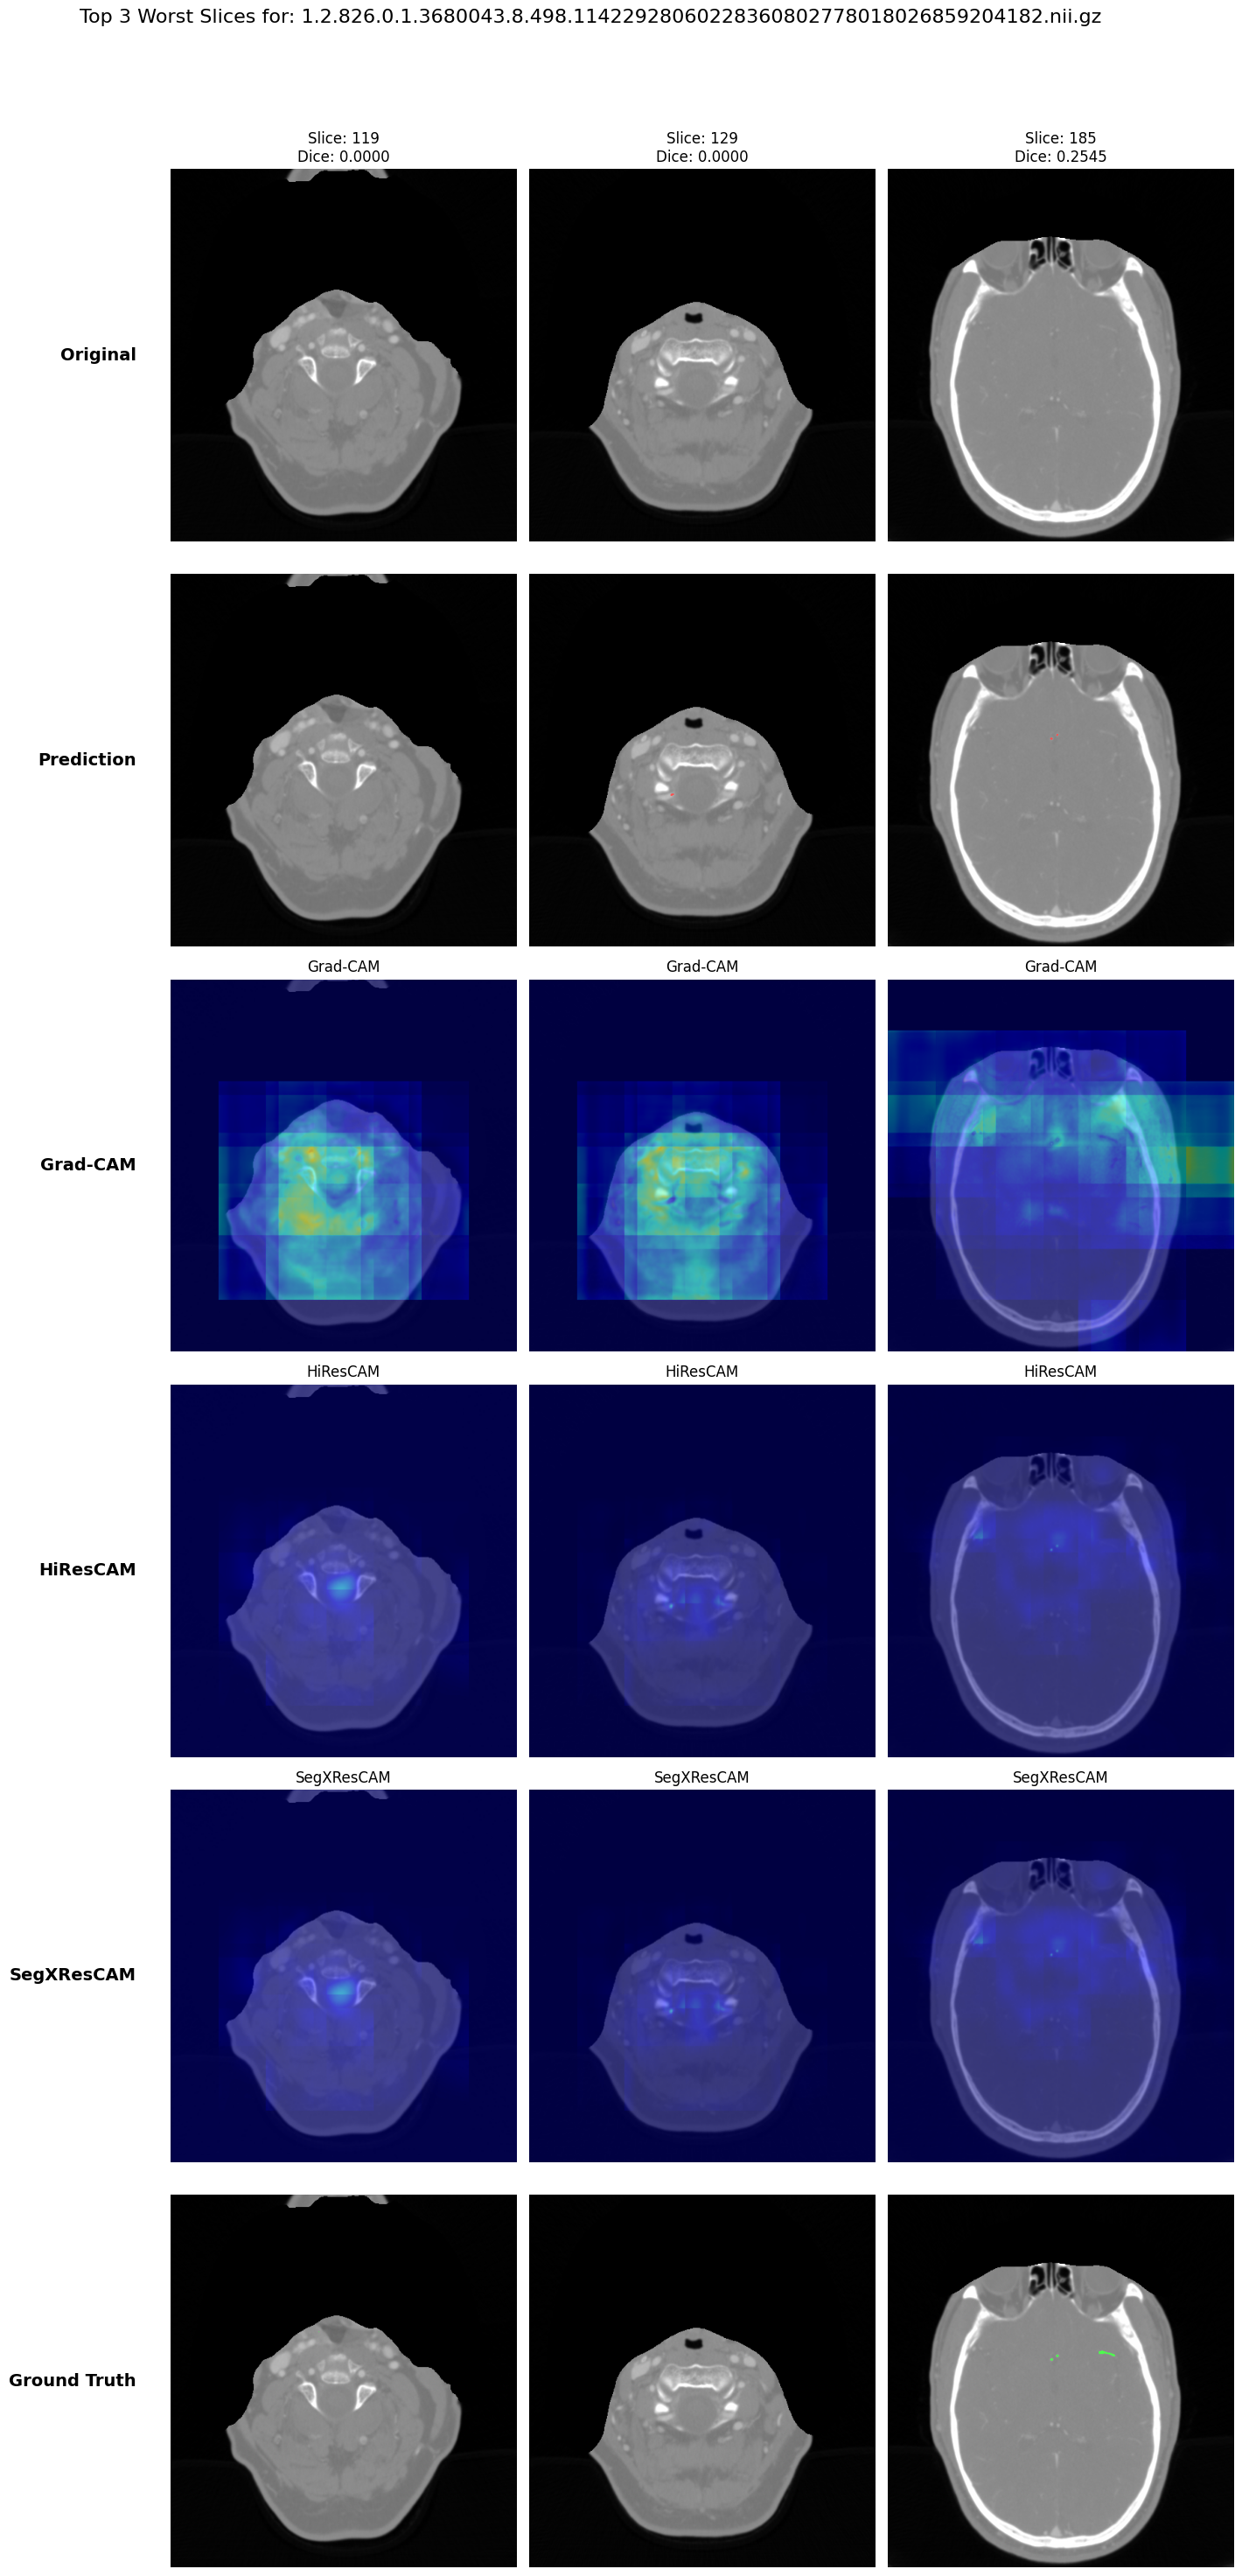


--- Processing: topcow_ct_001.nii.gz ---
  Scanning 243 slices (Axis 2)...
  -> TopCow file detected. Sampling from worst 120.

  Creating plot for 3 slices...


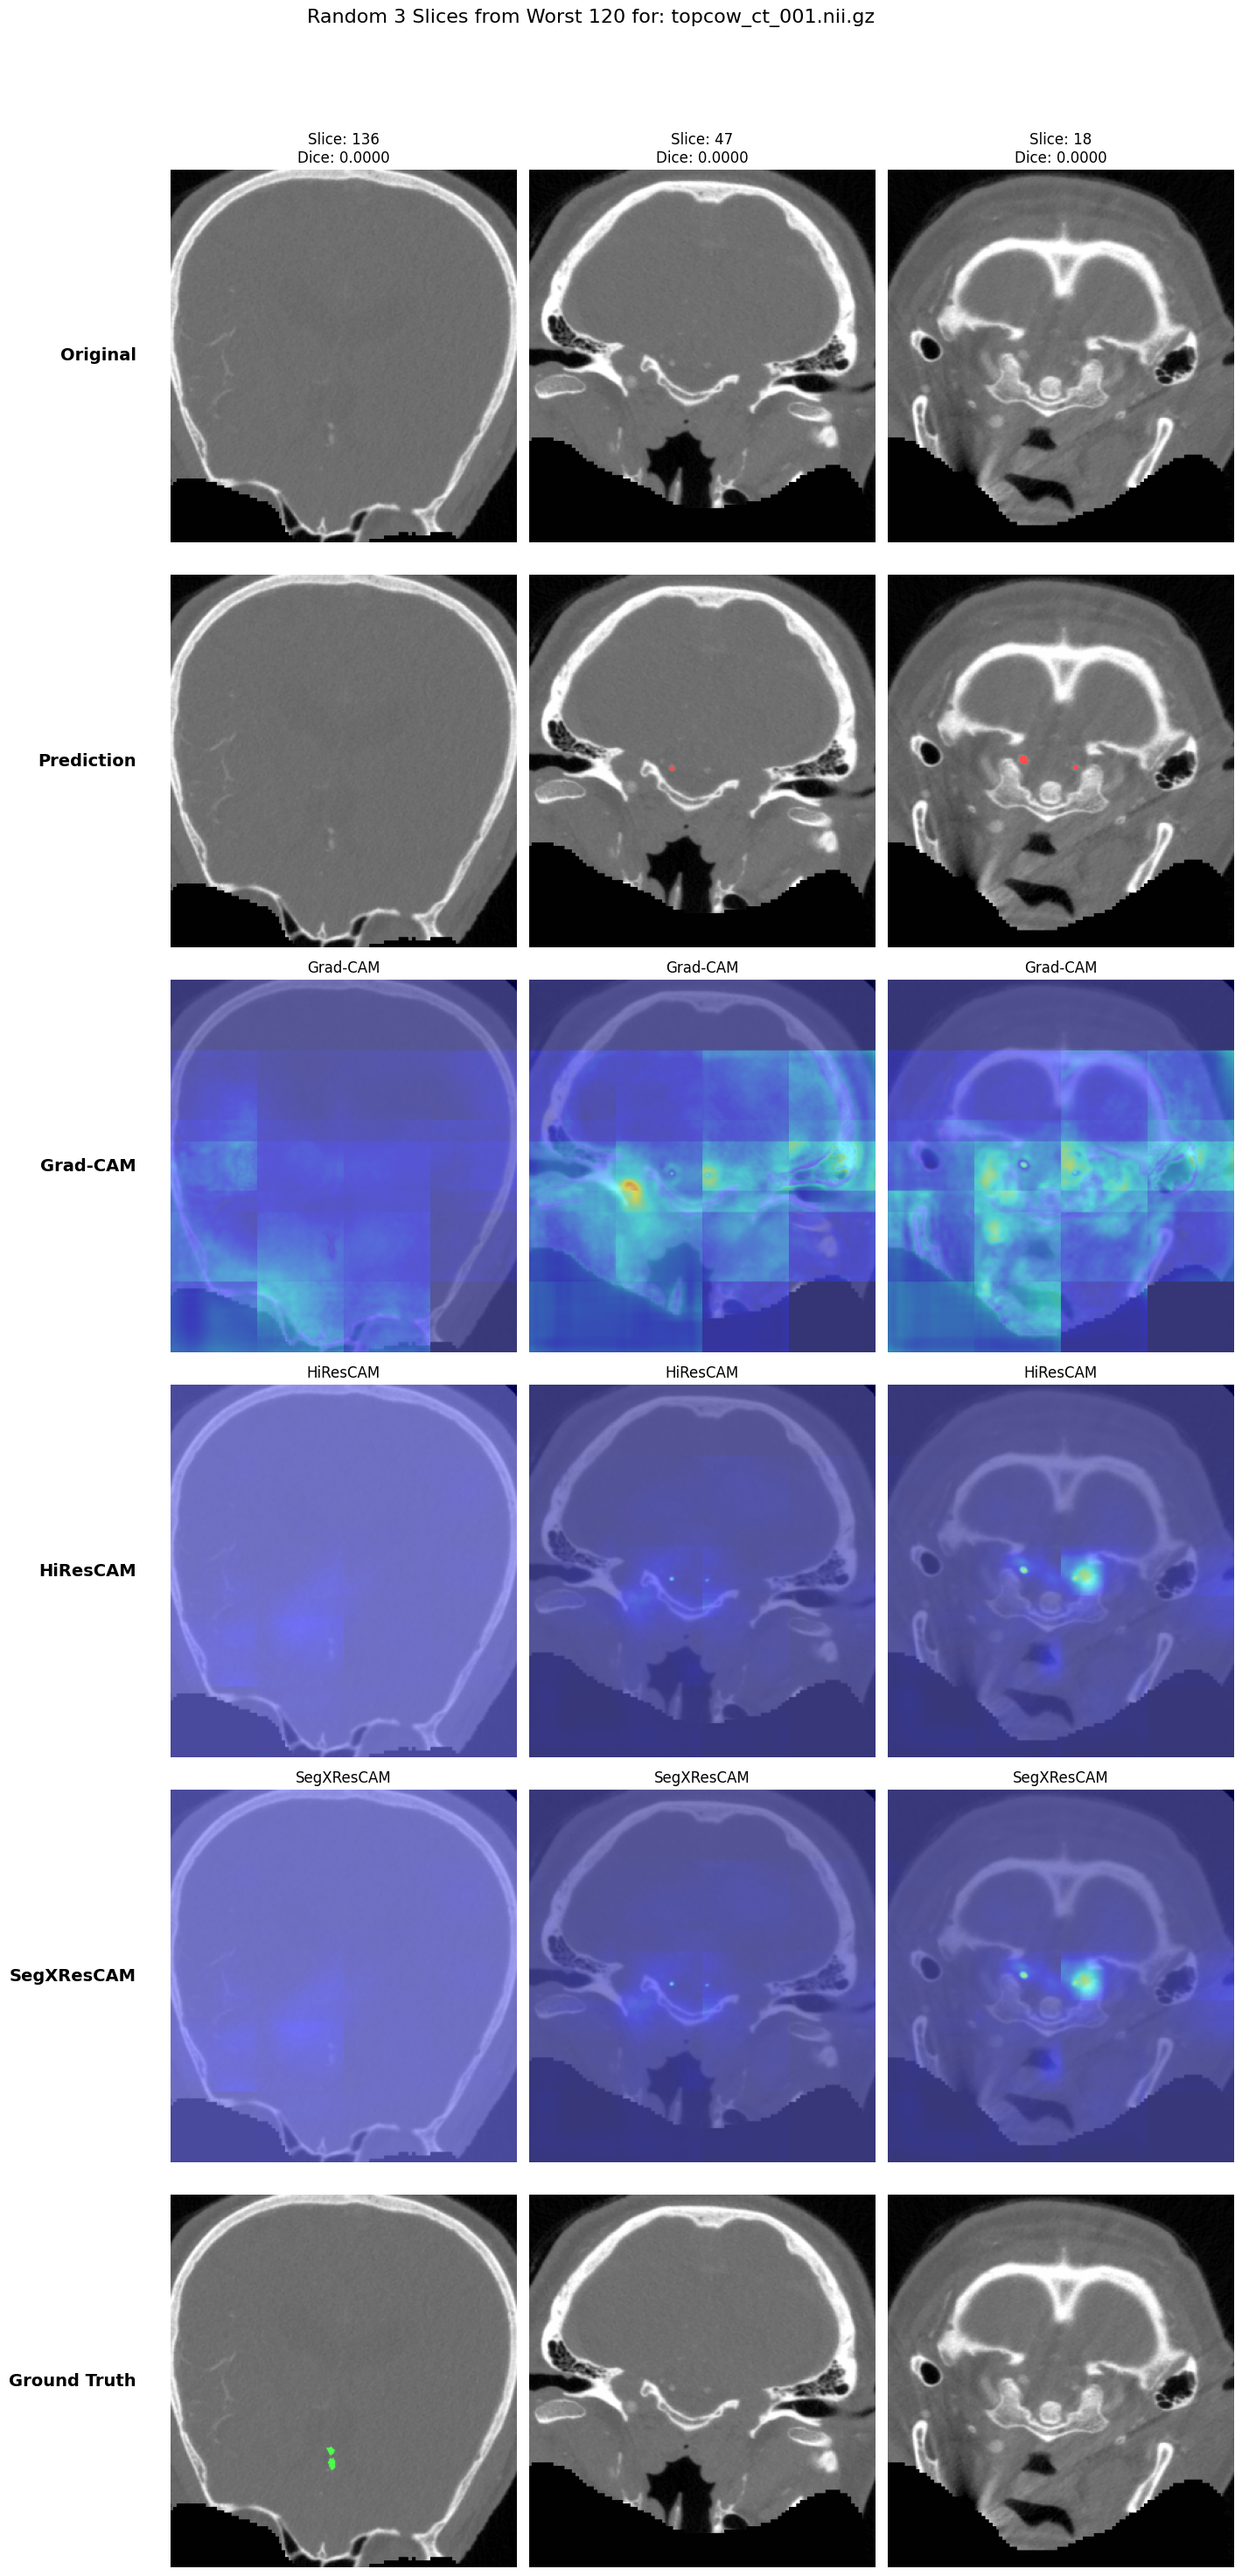



All volumes processed.


In [ ]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# --- Visualization Settings ---
NUM_TOP_SLICES_TO_SHOW = 3  # How many slices to plot (for both volumes)
WORST_POOL_SIZE = 120       # The pool size to sample from (for TopCow)
# Updated CAM base paths
CAM_PARENT_DIR_TOPCOW = "/content/content/infer/output"
CAM_PARENT_DIR_RSNA = "/content/content/infer/output_RSNA"
# ------------------------------

def calculate_dice_2d(pred_slice, label_slice, epsilon=1e-7):
    """
    Calculates the Dice score for a single 2D slice.
    """
    pred_bin = (pred_slice > 0).astype(np.float32) # Using > 0 threshold
    label_bin = (label_slice > 0).astype(np.float32)

    label_sum = np.sum(label_bin)
    pred_sum = np.sum(pred_bin)

    if label_sum == 0 and pred_sum == 0:
        return 1.0

    intersection = np.sum(label_bin * pred_bin)
    dice = (2. * intersection) / (label_sum + pred_sum + epsilon)
    return dice

def plot_cam_image(ax, base_path, cam_type, vol_basename, slice_idx, title):
    """
    Helper function to load and plot a CAM image from the specific path.
    """
    # --- UPDATED PATH ---
    # Path format: {base_path}/{cam_type}/{vol_basename}/slice_{slice_idx:04d}.png
    cam_file_path = f"{base_path}/{cam_type}/{vol_basename}/slice_{slice_idx:04d}.png"

    try:
        cam_img = mpimg.imread(cam_file_path)
        # Apply the same orientation as the NIfTI data: origin='lower'
        ax.imshow(cam_img, aspect='auto', origin='lower')
        ax.set_title(title)
        ax.axis('off')
    except FileNotFoundError:
        print(f"  Warning: CAM file not found: {cam_file_path}")
        ax.set_title(f"{title}\n(File Not Found)")
        ax.axis('off')
    except Exception as e:
        print(f"  Error loading CAM {cam_file_path}: {e}")
        ax.set_title(f"{title}\n(Load Error)")
        ax.axis('off')

# --- Your File Paths ---
file_triplets = [
    (
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz",
        "/content/CTA_997_nn_unet/predictval_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz",
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
    ),
    (
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow/topcow_ct_001_0000.nii.gz",
        "/content/CTA_997_nn_unet/predictval_cow/topcow_ct_001.nii.gz",
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel/topcow_ct_001.nii.gz"
    )
]

print("Processing 3D volumes to create per-volume visualizations...")

for vol_path, pred_path, label_path in file_triplets:

    file_name = os.path.basename(pred_path)
    is_topcow = "topcow" in file_name.lower()

    vol_basename = os.path.basename(vol_path).replace(".nii.gz", ".nii")

    print(f"\n--- Processing: {file_name} ---")

    if not all(os.path.exists(p) for p in [vol_path, pred_path, label_path]):
        print(f"  Warning: One or more files not found. Skipping.")
        continue
    current_volume_scores = []
    try:
        vol_nii = nib.load(vol_path)
        pred_nii = nib.load(pred_path)
        label_nii = nib.load(label_path)
        vol_data = vol_nii.get_fdata()
        pred_data = pred_nii.get_fdata()
        label_data = label_nii.get_fdata()
        if not (vol_data.shape == pred_data.shape == label_data.shape):
            print(f"  Shape mismatch! Skipping.")
            continue
        p1, p99 = np.percentile(vol_data, [1, 99])
        vol_data_normalized = np.clip(vol_data, p1, p99)
        vol_data_normalized = (vol_data_normalized - vol_data_normalized.min()) / \
                               (vol_data_normalized.max() - vol_data_normalized.min() + 1e-8)
        num_slices = pred_data.shape[2]
        print(f"  Scanning {num_slices} slices (Axis 2)...")
        for i in range(num_slices):
            pred_slice = pred_data[:, :, i]
            label_slice = label_data[:, :, i]
            dice = calculate_dice_2d(pred_slice, label_slice)
            current_volume_scores.append((dice, i))
    except Exception as e:
        print(f"  Error processing file {file_name}: {e}")
        continue

    # --- Select Slices to Plot ---
    if current_volume_scores:
        current_volume_scores.sort(key=lambda x: x[0])

        slices_to_plot = []
        plot_title = ""

        if is_topcow:
            print(f"  -> TopCow file detected. Sampling from worst {WORST_POOL_SIZE}.")
            worst_pool = current_volume_scores[:WORST_POOL_SIZE]
            num_to_sample = min(NUM_TOP_SLICES_TO_SHOW, len(worst_pool))
            if len(worst_pool) > 0:
                slices_to_plot = random.sample(worst_pool, num_to_sample)
                plot_title = f"Random {num_to_sample} Slices from Worst {len(worst_pool)} for: {file_name}"
            else:
                print("  No worst slices found in pool to sample from.")

        else: # This is RSNA
            print(f"  -> RSNA file detected. Taking top worst.")
            num_to_show = min(NUM_TOP_SLICES_TO_SHOW, len(current_volume_scores))
            slices_to_plot = current_volume_scores[:num_to_show]
            plot_title = f"Top {num_to_show} Worst Slices for: {file_name}"

        if not slices_to_plot:
            print("  No slices to plot for this volume.")
            continue

        num_to_plot = len(slices_to_plot)
        print(f"\n  Creating plot for {num_to_plot} slices...")

        # --- Create Figure (6 ROWS) ---
        num_rows = 6 # Original, Prediction, Grad-CAM, HiResCAM,SegXResCAM, Ground Truth
        fig_height = 30 # 6 rows * 5 height per row
        row_labels = ['Original', 'Prediction', 'Grad-CAM', 'HiResCAM', 'SegXResCAM', 'Ground Truth']


        # Define specific row indices for clarity
        ROW_ORIGINAL = 0
        ROW_PREDICTION = 1
        ROW_GRAD_CAM = 2
        ROW_GRAD_CAM_PP = 3
        ROW_HIRESCAM = 4
        ROW_GROUND_TRUTH = 5

        fig, axes = plt.subplots(num_rows, num_to_plot, figsize=(num_to_plot * 5, fig_height), facecolor='white')

        # Ensure 'axes' is always a 2D array
        if num_to_plot == 1:
            axes = axes.reshape(-1, 1)

        # Determine the correct CAM parent directory
        cam_parent_dir = CAM_PARENT_DIR_TOPCOW if is_topcow else CAM_PARENT_DIR_RSNA

        for col_idx in range(num_to_plot):
            dice, slice_idx = slices_to_plot[col_idx]

            # Get the 2D slices for plotting
            vol_slice = vol_data_normalized[:, :, slice_idx]
            pred_slice_bin = pred_data[:, :, slice_idx] > 0
            label_slice_bin = label_data[:, :, slice_idx] > 0

            # 1. Original Slice (Row 0)
            ax_orig = axes[ROW_ORIGINAL, col_idx]
            ax_orig.imshow(vol_slice.T, cmap='gray', aspect='auto', origin='lower')
            ax_orig.set_title(f"Slice: {slice_idx}\nDice: {dice:.4f}")
            ax_orig.axis('off')

            # 2. Prediction Overlay (Row 1, Red)
            ax_pred = axes[ROW_PREDICTION, col_idx]
            pred_overlay = np.stack([vol_slice.T] * 3, axis=-1)
            pred_mask = pred_slice_bin.T > 0
            if np.any(pred_mask):
                pred_overlay[pred_mask, 0] = 1.0; pred_overlay[pred_mask, 1] = 0.3; pred_overlay[pred_mask, 2] = 0.3
            ax_pred.imshow(pred_overlay, aspect='auto', origin='lower')
            ax_pred.axis('off')

            # --- 3. All CAMs (Rows 2, 3, 4) ---

            plot_cam_image(axes[ROW_GRAD_CAM, col_idx],
                           cam_parent_dir, "cam_gradcam", vol_basename,
                           slice_idx, "Grad-CAM")

            plot_cam_image(axes[ROW_GRAD_CAM_PP, col_idx],
                           cam_parent_dir, "cam_hirescam", vol_basename,
                           slice_idx, "HiResCAM")

            plot_cam_image(axes[ROW_HIRESCAM, col_idx],
                           cam_parent_dir, "cam_segxrescam", vol_basename,
                           slice_idx, "SegXResCAM")

            # 4. Ground Truth Overlay (Row 5, Green)
            ax_gt = axes[ROW_GROUND_TRUTH, col_idx]
            gt_overlay = np.stack([vol_slice.T] * 3, axis=-1)
            gt_mask = label_slice_bin.T > 0
            if np.any(gt_mask):
                gt_overlay[gt_mask, 0] = 0.3; gt_overlay[gt_mask, 1] = 1.0; gt_overlay[gt_mask, 2] = 0.3
            ax_gt.imshow(gt_overlay, aspect='auto', origin='lower')
            ax_gt.axis('off')

        # Add row labels on the left
        for row_idx, label in enumerate(row_labels):
            axes[row_idx, 0].text(-0.1, 0.5, label,
                                  transform=axes[row_idx, 0].transAxes,
                                  fontsize=14, fontweight='bold',
                                  ha='right', va='center')

        plt.suptitle(plot_title, fontsize=16)
        plt.tight_layout(rect=[0.05, 0, 1, 0.95])
        plt.show()

    else:
        print(f"  No slices were successfully processed for {file_name}.")

print("\n\nAll volumes processed.")

## Visualizing the top dice

Processing 3D volumes...

--- Processing: 1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz ---
  Scanning 217 slices...
  MODE: Selecting random slices from Top 10 'imperfect' (Dice < 1.0).
  Found 64 imperfect slices.
  Plotting 3 slices...


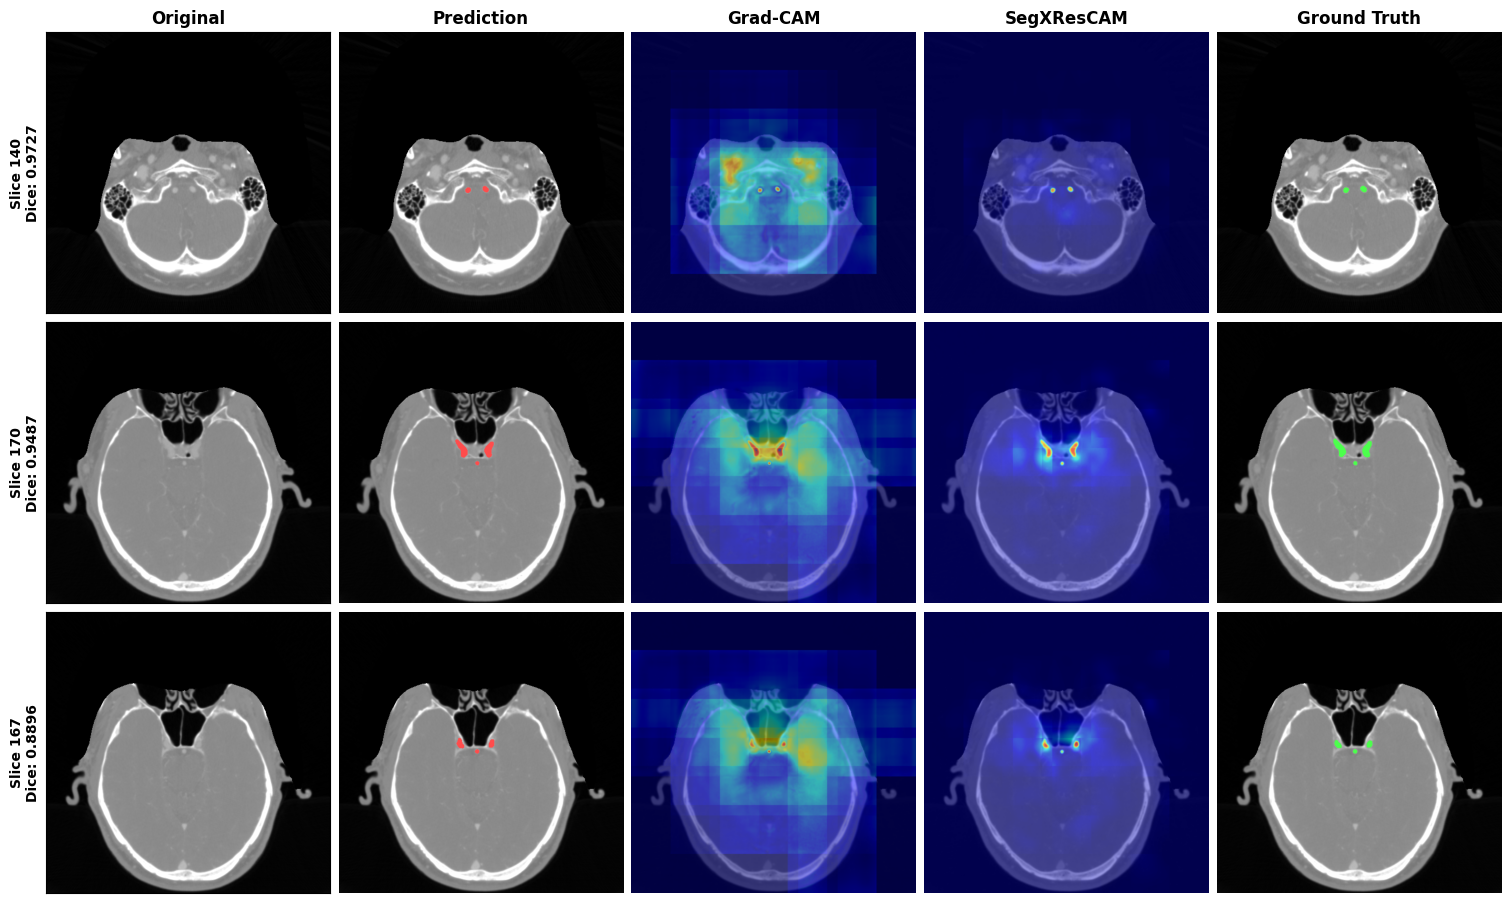


--- Processing: topcow_ct_001.nii.gz ---
  Scanning 243 slices...
  MODE: Selecting random slices from Top 10 'imperfect' (Dice < 1.0).
  Found 136 imperfect slices.
  Plotting 3 slices...


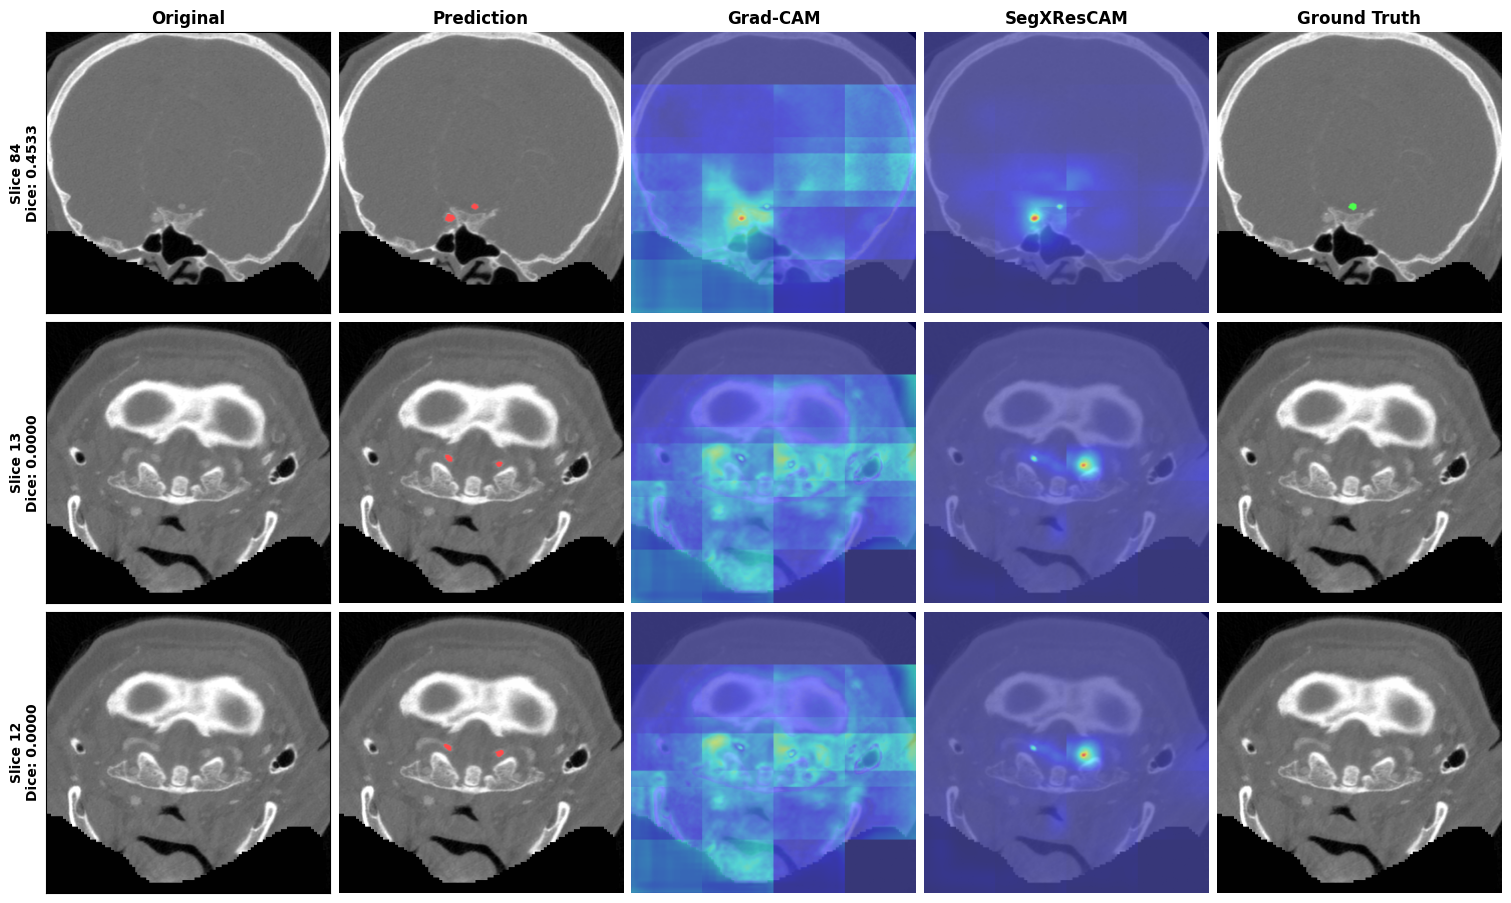

In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# --- Visualization Settings ---
NUM_TOP_SLICES_TO_SHOW = 3  # How many slices to plot (for both volumes)

# True:  Show a random sample of 'perfect' (Dice=1.0) slices.
# False: Show a random sample from the TOP 10 'imperfect' (Dice < 1.0) slices.
INCLUDE_DICE_1_0_SLICES = False
# ------------------------------

CAM_PARENT_DIR_TOPCOW = "/content/content/infer/infer/output"
CAM_PARENT_DIR_RSNA = "/content/content/infer/infer/output_RSNA"

# ... (Include your calculate_dice_2d and plot_cam_image functions here) ...
def calculate_dice_2d(pred_slice, label_slice, epsilon=1e-7):
    pred_bin = (pred_slice > 0).astype(np.float32)
    label_bin = (label_slice > 0).astype(np.float32)
    label_sum = np.sum(label_bin)
    pred_sum = np.sum(pred_bin)
    if label_sum == 0 and pred_sum == 0:
        return 1.0
    intersection = np.sum(label_bin * pred_bin)
    dice = (2. * intersection) / (label_sum + pred_sum + epsilon)
    return dice

def plot_cam_image(ax, base_path, cam_type, vol_basename, slice_idx, title):
    cam_file_path = f"{base_path}/{cam_type}/{vol_basename}/slice_{slice_idx:04d}.png"
    try:
        cam_img = mpimg.imread(cam_file_path)
        ax.imshow(cam_img, aspect='auto', origin='lower')
        ax.set_title(title)
        ax.axis('off')
    except Exception:
        ax.set_title(f"{title}\n(Not Found)")
        ax.axis('off')

# --- Your File Paths ---
file_triplets = [
    (
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182_0000.nii.gz",
        "/content/CTA_997_nn_unet/predictval_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz",
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
    ),
    (
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow/topcow_ct_001_0000.nii.gz",
        "/content/CTA_997_nn_unet/predictval_cow/topcow_ct_001.nii.gz",
        "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel/topcow_ct_001.nii.gz"
    )
]

print("Processing 3D volumes...")

for vol_path, pred_path, label_path in file_triplets:

    file_name = os.path.basename(pred_path)
    is_topcow = "topcow" in file_name.lower()
    vol_basename = os.path.basename(vol_path).replace(".nii.gz", ".nii")

    print(f"\n--- Processing: {file_name} ---")

    if not all(os.path.exists(p) for p in [vol_path, pred_path, label_path]):
        print(f"  Warning: Files missing. Skipping.")
        continue

    current_volume_scores = []

    try:
        # Load Data
        vol_nii = nib.load(vol_path)
        pred_nii = nib.load(pred_path)
        label_nii = nib.load(label_path)

        vol_data = vol_nii.get_fdata()
        pred_data = pred_nii.get_fdata()
        label_data = label_nii.get_fdata()

        # Normalize
        p1, p99 = np.percentile(vol_data, [1, 99])
        vol_data_normalized = np.clip(vol_data, p1, p99)
        vol_data_normalized = (vol_data_normalized - vol_data_normalized.min()) / \
                               (vol_data_normalized.max() - vol_data_normalized.min() + 1e-8)

        # Calculate Dice for all slices
        num_slices = pred_data.shape[2]
        print(f"  Scanning {num_slices} slices...")
        for i in range(num_slices):
            pred_slice = pred_data[:, :, i]
            label_slice = label_data[:, :, i]
            dice = calculate_dice_2d(pred_slice, label_slice)
            current_volume_scores.append((dice, i))

    except Exception as e:
        print(f"  Error: {e}")
        continue

    # --- Select Slices to Plot (CORRECTED LOGIC) ---
    if current_volume_scores:
        slices_to_plot = []
        plot_title = ""

        if INCLUDE_DICE_1_0_SLICES:
            # --- Logic A: Perfect Slices ---
            print(f"  MODE: Selecting random 'perfect' (Dice=1.0) slices.")
            perfect_slices = [s for s in current_volume_scores if s[0] == 1.0]
            print(f"  Found {len(perfect_slices)} perfect slices.")

            random.shuffle(perfect_slices)
            num_to_show = min(NUM_TOP_SLICES_TO_SHOW, len(perfect_slices))
            slices_to_plot = perfect_slices[:num_to_show]
            plot_title = f"{file_name}\nRandom Perfect Slices (Dice=1.0)"

        else:
            # --- Logic B: Imperfect Slices (Random from Top 10) ---
            print(f"  MODE: Selecting random slices from Top 10 'imperfect' (Dice < 1.0).")
            # 1. Filter out perfect slices
            imperfect_slices = [s for s in current_volume_scores if s[0] < 1.0]
            print(f"  Found {len(imperfect_slices)} imperfect slices.")

            # 2. Sort best to worst
            imperfect_slices.sort(key=lambda x: x[0], reverse=True)

            # 3. Take the Top 10 best candidates
            top_10_candidates = imperfect_slices[:50]

            # 4. Randomly sample from those Top 10
            num_to_show = min(NUM_TOP_SLICES_TO_SHOW, len(top_10_candidates))
            if top_10_candidates:
                slices_to_plot = random.sample(top_10_candidates, num_to_show)
                # Sort them back by dice for nicer plotting order (optional)
                slices_to_plot.sort(key=lambda x: x[0], reverse=True)

            plot_title = f""

        # --- Plotting Code ---
        if not slices_to_plot:
            print(f"  No slices to plot.")
            continue

        num_to_plot = len(slices_to_plot) # This determines ROWS now
        print(f"  Plotting {num_to_plot} slices...")

        # 5 Columns: Original, Prediction, Grad-CAM, SegXResCAM, GT
        num_cols = 5
        col_labels = ['Original', 'Prediction', 'Grad-CAM', 'SegXResCAM', 'Ground Truth']

        # Dimensions
        PLOT_SIZE = 3.0 # Inches per square
        fig_width = num_cols * PLOT_SIZE
        fig_height = num_to_plot * PLOT_SIZE

        fig, axes = plt.subplots(num_to_plot, num_cols,
                                 figsize=(fig_width, fig_height),
                                 facecolor='white',
                                 constrained_layout=True)

        # Handle 1D array if only 1 slice is plotted
        if num_to_plot == 1:
            axes = axes.reshape(1, -1)

        cam_parent_dir = CAM_PARENT_DIR_TOPCOW if is_topcow else CAM_PARENT_DIR_RSNA

        for row_idx in range(num_to_plot):
            dice, slice_idx = slices_to_plot[row_idx]

            # Prepare Data
            vol_slice = vol_data_normalized[:, :, slice_idx]
            pred_slice_bin = pred_data[:, :, slice_idx] > 0
            label_slice_bin = label_data[:, :, slice_idx] > 0

            # --- Column 0: Original ---
            ax_orig = axes[row_idx, 0]
            ax_orig.imshow(vol_slice.T, cmap='gray', aspect='auto', origin='lower')
            # Label the Slice Info on the Left
            ax_orig.set_ylabel(f"Slice {slice_idx}\nDice: {dice:.4f}", fontsize=10, fontweight='bold')
            # Remove ticks
            ax_orig.set_xticks([]); ax_orig.set_yticks([])

            # --- Column 1: Prediction Overlay ---
            ax_pred = axes[row_idx, 1]
            pred_overlay = np.stack([vol_slice.T] * 3, axis=-1)
            pred_mask = pred_slice_bin.T > 0
            if np.any(pred_mask):
                pred_overlay[pred_mask, 0] = 1.0; pred_overlay[pred_mask, 1] = 0.3; pred_overlay[pred_mask, 2] = 0.3 # Red
            ax_pred.imshow(pred_overlay, aspect='auto', origin='lower')
            ax_pred.axis('off')

            # --- Column 2: Grad-CAM ---
            # Using empty title "" because we put headers at the top
            plot_cam_image(axes[row_idx, 2], cam_parent_dir, "cam_gradcam", vol_basename, slice_idx, "")
            axes[row_idx, 2].axis('off')

            # --- Column 3: SegXResCAM ---
            plot_cam_image(axes[row_idx, 3], cam_parent_dir, "cam_segxrescam", vol_basename, slice_idx, "")
            axes[row_idx, 3].axis('off')

            # --- Column 4: Ground Truth ---
            ax_gt = axes[row_idx, 4]
            gt_overlay = np.stack([vol_slice.T] * 3, axis=-1)
            gt_mask = label_slice_bin.T > 0
            if np.any(gt_mask):
                gt_overlay[gt_mask, 0] = 0.3; gt_overlay[gt_mask, 1] = 1.0; gt_overlay[gt_mask, 2] = 0.3 # Green
            ax_gt.imshow(gt_overlay, aspect='auto', origin='lower')
            ax_gt.axis('off')

            # --- Add Column Headers (Only on Top Row) ---
            if row_idx == 0:
                for col_i, label in enumerate(col_labels):
                    axes[0, col_i].set_title(label, fontsize=12, fontweight='bold')

        plt.suptitle(plot_title, fontsize=14)
        plt.show()

In [ ]:
import numpy as np
import SimpleITK as sitk
import os
import re
import pandas as pd

# ==========================================
# CONFIGURATION
# ==========================================
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# The metrics will be calculated for these 3 methods
METHODS = ['segxrescam', 'hirescam', 'gradcam']

THRESHOLDS = [0.2, 0.3, 0.4, 0.5, 0.6]

# --- PATHS ---
# Base directory for RSNA CAM outputs
RSNA_BASE_DIR = "/content/content/infer/output_RSNA"

# RSNA GT and PRED
RSNA_GT   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
RSNA_PRED = "/content/CTA_997_nn_unet/predictval_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"

# TopCow Directories
TOPCOW_CAM_DIR  = "/content/content/infer/output"
TOPCOW_GT_DIR   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel"
TOPCOW_PRED_DIR = "/content/CTA_997_nn_unet/predictval_cow"

# ==========================================
# 1. HELPER: Load Triplet (CAM, GT, PRED)
# ==========================================
def load_triplet(cam_path, gt_path, pred_path):
    try:
        if not os.path.exists(cam_path):
            print(f"  [Warning] CAM file missing: {cam_path}")
            return None, None, None

        # 1. Load CAM
        cam = np.load(cam_path)
        cam = np.squeeze(cam)

        # 2. Load GT
        gt_img = sitk.ReadImage(gt_path)
        gt = sitk.GetArrayFromImage(gt_img)
        gt = (gt > 0).astype(np.uint8)

        # 3. Load PRED
        pred_img = sitk.ReadImage(pred_path)
        pred = sitk.GetArrayFromImage(pred_img)
        pred = (pred > 0).astype(np.uint8)

        # 4. Shape Fix & Normalization
        if cam.shape != gt.shape:
            # Attempt transpose if axes are swapped
            if cam.transpose(2, 1, 0).shape == gt.shape:
                cam = cam.transpose(2, 1, 0)
            else:
                print(f"  [Error] Shape mismatch. CAM: {cam.shape}, GT: {gt.shape}")
                return None, None, None

        # Check Pred shape too
        if pred.shape != gt.shape:
            print(f"  [Error] Shape Mismatch Pred: {pred.shape} vs GT {gt.shape}")
            return None, None, None

        # Min-Max Normalization
        c_min, c_max = cam.min(), cam.max()
        if c_max - c_min > 0:
            cam = (cam - c_min) / (c_max - c_min)
        else:
            cam = np.zeros_like(cam)

        return cam, gt, pred

    except Exception as e:
        print(f"  [Error] loading files: {e}")
        return None, None, None

# ==========================================
# 2. HELPER: Calculate Metrics
# ==========================================
def calc_metrics(cam_norm, target_mask, threshold=0.4):
    """
    Generic function to compare CAM vs ANY Mask (GT or PM)
    """
    epsilon = 1e-7
    cam_mask = (cam_norm > threshold).astype(np.uint8)

    TP = np.sum((cam_mask == 1) & (target_mask == 1))
    FP = np.sum((cam_mask == 1) & (target_mask == 0))
    FN = np.sum((cam_mask == 0) & (target_mask == 1))

    precision = TP / (TP + FP + epsilon)
    recall = TP / (TP + FN + epsilon)
    iou = TP / (TP + FP + FN + epsilon)
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)

    return iou, f1, precision, recall

# ==========================================
# 3. MAIN EXECUTION
# ==========================================
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def run_comparative_analysis():
    results = []

    print("="*100)
    print(f"MULTI-METHOD COMPARISON: {METHODS}")
    print(f"S3 COMPARISON: XAI vs GT (Correctness) AND XAI vs PM (Faithfulness)")
    print("="*100)

    # --- Loop through each method (segxrescam, hirescam, gradcam) ---
    for method in METHODS:
        print(f"\n>>> Processing Method: {method.upper()}")

        # ---------------------------
        # A. Process RSNA (Single File)
        # ---------------------------
        # Assumption: File is named 'segxrescam.npy', 'hirescam.npy', etc.
        rsna_cam_path = os.path.join(RSNA_BASE_DIR, f"{method}.npy")

        cam, gt, pred = load_triplet(rsna_cam_path, RSNA_GT, RSNA_PRED)

        if cam is not None:
            for t in THRESHOLDS:
                iou_gt, f1_gt, prec_gt, rec_gt = calc_metrics(cam, gt, t)
                iou_pm, f1_pm, prec_pm, rec_pm = calc_metrics(cam, pred, t)

                results.append({
                    'Method': method,
                    'Dataset': 'Source',
                    'ID': 'RSNA',
                    'Threshold': t,
                    'IoU_GT': iou_gt, 'F1_GT': f1_gt, 'Prec_GT': prec_gt, 'Rec_GT': rec_gt,
                    'IoU_PM': iou_pm, 'F1_PM': f1_pm, 'Prec_PM': prec_pm, 'Rec_PM': rec_pm
                })
        else:
            print(f"  Skipping RSNA for {method} (File not found)")

        # ---------------------------
        # B. Process TopCow (Batch)
        # ---------------------------
        gt_files = sorted([f for f in os.listdir(TOPCOW_GT_DIR) if f.endswith('.nii.gz')])

        # Filter files starting with the specific method name (e.g., 'gradcam_...')
        cam_files = [f for f in os.listdir(TOPCOW_CAM_DIR) if f.startswith(method)]
        cam_files.sort(key=natural_sort_key)

        count = min(len(gt_files), len(cam_files))
        print(f"  Found {len(cam_files)} CAM files for {method} (Matching first {count} GTs)")

        for i in range(count):
            gt_name = gt_files[i]
            cam_name = cam_files[i]

            c_path = os.path.join(TOPCOW_CAM_DIR, cam_name)
            g_path = os.path.join(TOPCOW_GT_DIR, gt_name)
            p_path = os.path.join(TOPCOW_PRED_DIR, gt_name)

            cam, gt, pred = load_triplet(c_path, g_path, p_path)

            if cam is not None:
                for t in THRESHOLDS:
                    iou_gt, f1_gt, prec_gt, rec_gt = calc_metrics(cam, gt, t)
                    iou_pm, f1_pm, prec_pm, rec_pm = calc_metrics(cam, pred, t)

                    results.append({
                        'Method': method,
                        'Dataset': 'Target',
                        'ID': gt_name,
                        'Threshold': t,
                        'IoU_GT': iou_gt, 'F1_GT': f1_gt, 'Prec_GT': prec_gt, 'Rec_GT': rec_gt,
                        'IoU_PM': iou_pm, 'F1_PM': f1_pm, 'Prec_PM': prec_pm, 'Rec_PM': rec_pm
                    })

    # --- 4. DISPLAY ---
    if not results:
        print("No results generated. Check paths.")
        return

    df = pd.DataFrame(results)

    # 1. Aggregate Stats grouped by Method, Dataset AND Threshold
    print("\n" + "="*120)
    print("AGGREGATE STATS (Grouped by Method, Dataset & Threshold)")
    print("="*120)

    cols = ['IoU_GT', 'F1_GT', 'Prec_GT', 'Rec_GT', 'IoU_PM', 'F1_PM', 'Prec_PM', 'Rec_PM']
    stats = df.groupby(['Method', 'Dataset', 'Threshold'])[cols].mean()
    print(stats.to_string(float_format="%.4f"))


if __name__ == "__main__":
    run_comparative_analysis()

MULTI-METHOD COMPARISON: ['segxrescam', 'hirescam', 'gradcam']
S3 COMPARISON: XAI vs GT (Correctness) AND XAI vs PM (Faithfulness)

>>> Processing Method: SEGXRESCAM
  Found 6 CAM files for segxrescam (Matching first 6 GTs)

>>> Processing Method: HIRESCAM
  Found 6 CAM files for hirescam (Matching first 6 GTs)

>>> Processing Method: GRADCAM
  Found 6 CAM files for gradcam (Matching first 6 GTs)

AGGREGATE STATS (Grouped by Method, Dataset & Threshold)
                              IoU_GT  F1_GT  Prec_GT  Rec_GT  IoU_PM  F1_PM  Prec_PM  Rec_PM
Method     Dataset Threshold                                                                
gradcam    Source  0.2        0.0042 0.0085   0.0043  0.8629  0.0039 0.0078   0.0039  0.8842
                   0.3        0.0102 0.0201   0.0102  0.7193  0.0095 0.0188   0.0095  0.7516
                   0.4        0.0292 0.0568   0.0299  0.5508  0.0282 0.0549   0.0288  0.5921
                   0.5        0.0730 0.1361   0.0837  0.3633  0.0738 0.1375  

## Save Visuals

In [ ]:
import numpy as np
import SimpleITK as sitk
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# CONFIGURATION
# ==========================================
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- THRESHOLDS ---
CAM_EVAL_THRESH = 0.3
DICE_CUTOFF     = 0.6
XAI_F1_CUTOFF   = 0.4

# --- OUTPUT DIRECTORY ---
OUTPUT_ROOT = "/content/Visual_Analysis_Raw"
os.makedirs(OUTPUT_ROOT, exist_ok=True)

# --- PATHS ---
RSNA_CAM  = "/content/content/infer/output_RSNA/segxrescam.npy"
RSNA_GT   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/labelTs/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
RSNA_PRED = "/content/CTA_997_nn_unet/predictval_RSNA/1.2.826.0.1.3680043.8.498.11422928060228360802778018026859204182.nii.gz"
# Infer RSNA Image Path
RSNA_IMG = RSNA_GT.replace("labelTs", "val_RSNA").replace(".nii.gz", "_0000.nii.gz")

TOPCOW_CAM_DIR  = "/content/content/infer/output"
TOPCOW_GT_DIR   = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/vallabel"
TOPCOW_PRED_DIR = "/content/CTA_997_nn_unet/predictval_cow"
TOPCOW_IMG_DIR  = "/content/U-Mamba/data/nnUNet_raw/Dataset997_CTA_Aneurysm/val_cow"

# ==========================================
# 1. HELPER: Categorize
# ==========================================
def categorize_slice(dice, xai_f1):
    is_dice_good = dice >= DICE_CUTOFF
    is_xai_good  = xai_f1 >= XAI_F1_CUTOFF

    if is_dice_good and is_xai_good:       return "1_Good_Dice_Good_XAI"
    elif is_dice_good and not is_xai_good: return "2_Good_Dice_Bad_XAI"
    elif not is_dice_good and is_xai_good: return "3_Bad_Dice_Good_XAI"
    else:                                  return "4_Bad_Dice_Bad_XAI"

# ==========================================
# 2. HELPER: Plotting Function (RAW VISUALIZATION)
# ==========================================
def save_slice_figure(save_path, vol_id, slice_idx, img, gt, pred, cam, dice, f1):
    """Generates a 4-column figure with RAW Heatmap Overlay."""
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Rotation helper
    def prep(arr): return np.rot90(arr)

    img = prep(img)
    gt = prep(gt)
    pred = prep(pred)
    cam = prep(cam)

    # 1. Original CT
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title(f"CT Slice {slice_idx}", fontsize=10)
    axes[0].axis('off')

    # 2. Ground Truth (Green)
    axes[1].imshow(img, cmap='gray')
    if np.sum(gt) > 0:
        axes[1].imshow(np.ma.masked_where(gt == 0, gt), cmap='Greens', alpha=0.3, vmin=0, vmax=1)
        axes[1].contour(gt, colors='lime', linewidths=0.8)
    axes[1].set_title("Ground Truth", fontsize=10)
    axes[1].axis('off')

    # 3. Prediction (Red)
    axes[2].imshow(img, cmap='gray')
    if np.sum(pred) > 0:
        axes[2].imshow(np.ma.masked_where(pred == 0, pred), cmap='Reds', alpha=0.3, vmin=0, vmax=1)
        axes[2].contour(pred, colors='red', linewidths=0.8)
    axes[2].set_title(f"Prediction (Dice: {dice:.2f})", fontsize=10)
    axes[2].axis('off')

    # 4. XAI Heatmap (RAW OVERLAY)
    axes[3].imshow(img, cmap='gray')

    # Standard Jet Overlay: 0.0 (Blue) -> 1.0 (Red)
    # alpha=0.5 ensures you can see the bone/tissue underneath
    axes[3].imshow(cam, cmap='jet', alpha=0.5, vmin=0, vmax=1)

    # Optional: Keep the white contour to show the threshold boundary
    if np.max(cam) > 0.5:
        axes[3].contour(cam, levels=[0.5], colors='white', linewidths=0.5, alpha=0.8)

    axes[3].set_title(f"XAI (F1: {f1:.2f})", fontsize=10)
    axes[3].axis('off')


    plt.savefig(save_path, bbox_inches='tight', dpi=100)
    plt.close(fig)

# ==========================================
# 3. HELPER: Normalize Image
# ==========================================
def normalize_ct(img_slice):
    p05 = np.percentile(img_slice, 5)
    p99 = np.percentile(img_slice, 99.5)
    img = np.clip(img_slice, p05, p99)
    if (p99 - p05) == 0: return img
    return (img - p05) / (p99 - p05)

# ==========================================
# 4. PROCESSOR
# ==========================================
def process_volume_slices(dataset_name, vol_id, cam_path, gt_path, pred_path, img_path):
    try:
        # Load
        cam = np.load(cam_path); cam = np.squeeze(cam)
        gt = sitk.GetArrayFromImage(sitk.ReadImage(gt_path)); gt = (gt > 0).astype(np.uint8)
        pred = sitk.GetArrayFromImage(sitk.ReadImage(pred_path)); pred = (pred > 0).astype(np.uint8)

        if os.path.exists(img_path):
            img_vol = sitk.GetArrayFromImage(sitk.ReadImage(img_path))
        else:
            img_vol = np.zeros_like(gt)

        # Fix Shape
        if cam.shape != gt.shape:
            if cam.transpose(2, 1, 0).shape == gt.shape: cam = cam.transpose(2, 1, 0)
            else: return

        # Normalize CAM
        c_min, c_max = cam.min(), cam.max()
        if c_max - c_min > 0: cam = (cam - c_min) / (c_max - c_min)
        else: cam = np.zeros_like(cam)

        num_slices = gt.shape[0]
        epsilon = 1e-7
        saved_count = 0

        for z in range(num_slices):
            gt_s   = gt[z, :, :]
            pred_s = pred[z, :, :]
            cam_s  = cam[z, :, :]
            img_s  = normalize_ct(img_vol[z, :, :])

            # Skip Empty Slices
            if np.sum(gt_s) == 0 and np.sum(pred_s) == 0: continue

            # Calc Metrics
            inter = np.sum(pred_s * gt_s)
            union = np.sum(pred_s) + np.sum(gt_s)
            dice = (2.0 * inter) / (union + epsilon)

            cam_mask = (cam_s > CAM_EVAL_THRESH).astype(np.uint8)
            TP = np.sum((cam_mask == 1) & (gt_s == 1))
            FP = np.sum((cam_mask == 1) & (gt_s == 0))
            FN = np.sum((cam_mask == 0) & (gt_s == 1))

            prec = TP / (TP + FP + epsilon)
            rec  = TP / (TP + FN + epsilon)
            f1   = 2 * (prec * rec) / (prec + rec + epsilon)

            # Categorize
            cat = categorize_slice(dice, f1)

            # --- SAVE FIGURE ---
            save_dir = os.path.join(OUTPUT_ROOT, dataset_name, cat)
            os.makedirs(save_dir, exist_ok=True)

            fname = f"{vol_id}_slice{z:03d}.png"
            save_path = os.path.join(save_dir, fname)

            save_slice_figure(save_path, vol_id, z, img_s, gt_s, pred_s, cam_s, dice, f1)
            saved_count += 1

            if saved_count % 10 == 0:
                print(f"  {vol_id}: Saved {saved_count} slices...")

    except Exception as e:
        print(f"Error processing {vol_id}: {e}")

# ==========================================
# 5. MAIN EXECUTION
# ==========================================
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def run_visual_generation():
    print("="*100)
    print("GENERATING VISUAL FIGURES (RAW OVERLAY)")
    print(f"Output: {OUTPUT_ROOT}")
    print("="*100)

    # --- 1. RSNA ---
    print("\n--- Processing RSNA ---")
    process_volume_slices('Source', 'RSNA_Case', RSNA_CAM, RSNA_GT, RSNA_PRED, RSNA_IMG)

    # --- 2. TopCow ---
    print("\n--- Processing TopCow ---")
    gt_files = sorted([f for f in os.listdir(TOPCOW_GT_DIR) if f.endswith('.nii.gz')])
    cam_files = [f for f in os.listdir(TOPCOW_CAM_DIR) if f.startswith('segxrescam')]
    cam_files.sort(key=natural_sort_key)
    count = min(len(gt_files), len(cam_files))

    for i in range(count):
        gt_name = gt_files[i]
        cam_name = cam_files[i]
        c_path = os.path.join(TOPCOW_CAM_DIR, cam_name)
        g_path = os.path.join(TOPCOW_GT_DIR, gt_name)
        p_path = os.path.join(TOPCOW_PRED_DIR, gt_name)

        img_name = gt_name.replace(".nii.gz", "_0000.nii.gz")
        i_path = os.path.join(TOPCOW_IMG_DIR, img_name)

        print(f"Processing {gt_name}...")
        process_volume_slices('Target', gt_name, c_path, g_path, p_path, i_path)

    print("\nDone! All images saved to:", OUTPUT_ROOT)

if __name__ == "__main__":
    run_visual_generation()